<html>
<div>
  <img src="https://www.engineersgarage.com/wp-content/uploads/2021/11/TCH36-01-scaled.jpg" width=360px width=auto style="vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: white;"> <br/> University of Tehran <br/> AI_CA5 <br/> Spring 02 </span>
</div>
<span style="font-family: Georgia; font-size:15pt; color: white; vertical-align: middle;"> low_mist - std id: 810100186 </span>
</html>

In this notebook we are to learn about machine learning and try to anticipate price of houses.

## Problem Description
in this problem we will learn about basics of machine learning, in order to assign prices to houses. At first we try to do that by using linear regression without any library, and then we use Scikit-Learn to do that.

## Dataset
The `house_data.csv` file contains data about houses and their prices in one of the cities of Washington, D.C. in years 2014 and 2015. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from copy import deepcopy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import category_encoders as cat_enc
from mlxtend.evaluate import bias_variance_decomp
from xgboost import XGBClassifier

DATASET_PATH = "assets/house_data.csv"

In [10]:
df = pd.read_csv(DATASET_PATH)
pd.set_option("display.max_columns", None)
df.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,1.0,0,0,3,7,1180,0.0,1955.0,0,98178,47.5112,-122.257,1340,5650,Suburban,Contemporary,67
1,1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,NaN,0,0,3,7,2170,400.0,NaN,1991,98125,47.7210,-122.319,1690,7639,Suburban,Ranch,71
2,2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,1.0,0,0,3,6,770,0.0,1933.0,0,98028,47.7379,-122.233,2720,8062,Rural,Victorian,89
3,3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000,1.0,0,0,5,7,1050,910.0,1965.0,0,98136,47.5208,-122.393,1360,5000,Urban,Colonial,57
4,4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080,1.0,0,0,3,8,1680,0.0,1987.0,0,98074,47.6168,-122.045,1800,7503,Suburban,Cape Cod,35
5,5,5,5,7237550310,20140512T000000,1230000.0,4,4.50,5420.0,101930,1.0,0,0,3,11,3890,1530.0,2001.0,0,98053,47.6561,-122.005,4760,101930,Urban,Colonial,21
6,6,6,6,1321400060,20140627T000000,257500.0,3,2.25,1715.0,6819,2.0,0,0,3,7,1715,0.0,1995.0,0,98003,47.3097,-122.327,2238,6819,Urban,Ranch,27
7,7,7,7,2008000270,20150115T000000,291850.0,3,1.50,1060.0,9711,NaN,0,0,3,7,1060,0.0,NaN,0,98198,47.4095,-122.315,1650,9711,Rural,Ranch,59
8,8,8,8,2414600126,20150415T000000,229500.0,3,1.00,NaN,7470,1.0,0,0,3,7,1050,730.0,1960.0,0,98146,47.5123,-122.337,1780,8113,Rural,Ranch,62
9,9,9,9,3793500160,20150312T000000,323000.0,3,2.50,NaN,6560,2.0,0,0,3,7,1890,0.0,2003.0,0,98038,47.3684,-122.031,2390,7570,Urban,Ranch,19


## Part1. Analysis of datasets
### Q1-1. Describe dataset using info and describe methods.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.2   21613 non-null  int64  
 1   Unnamed: 0.1   21613 non-null  int64  
 2   Unnamed: 0     21613 non-null  int64  
 3   id             21613 non-null  int64  
 4   date           21613 non-null  object 
 5   price          21613 non-null  float64
 6   bedrooms       21613 non-null  int64  
 7   bathrooms      21613 non-null  float64
 8   sqft_living    18528 non-null  float64
 9   sqft_lot       21613 non-null  int64  
 10  floors         18530 non-null  float64
 11  waterfront     21613 non-null  int64  
 12  view           21613 non-null  int64  
 13  condition      21613 non-null  int64  
 14  grade          21613 non-null  int64  
 15  sqft_above     21613 non-null  int64  
 16  sqft_basement  21184 non-null  float64
 17  yr_built       18531 non-null  float64
 18  yr_ren

The `info` method returns general info about the dataframe, its data, and the data types.

The panda's dataframe's is printed and we can see that there are 21613 entries in the dataframe.  
There are 26 columns and for each of them, the column's name, its data types, and the non-null count is shown.  
Non-null count shows how many rows have a value in a specific column.  
At the end, the count of each data type among the columns and the structure's memory usage is shown.

In [12]:
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,18528.000000,2.161300e+04,18530.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21184.000000,18531.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.367464,2.111900,2077.569031,1.510697e+04,1.492903,0.007542,0.234303,3.409430,7.645722,1788.390691,292.121082,1970.896714,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.943028,0.780697,953.971679,4.142051e+04,0.538562,0.086517,0.766318,0.650743,2.020809,828.090978,442.637777,29.406420,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,-234.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


The `describe` method shows some statistical information about the dataframe.

Each table row reports a property of the corresponding column's data:  

- count: The number of the data.
- mean: The average of the data.
- std: The standard deviation of the data.
- min: The minimum data.
- 25%: The first quartile of the column's data.
- 50%: The median of the column's data.
- 75%: The third quartile of the column's data.
- max: The maximum data.

### Q1-2. For each feature show number and proportion of missing values.

In [13]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    nan_values_count = df.isna().sum()
    nan_values_percent = nan_values_count / len(df)
    nan_values = pd.concat([nan_values_count, nan_values_percent], axis=1, keys=["Missing", "Percentage"])
    return nan_values
    return nan_values[nan_values["Missing"] != 0] # this one is better but I need to 
                                                  # show the missing values for every value in report

missing_values(df)

,Missing,Percentage
Unnamed: 0.2,0,0.000000
Unnamed: 0.1,0,0.000000
Unnamed: 0,0,0.000000
id,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,3085,0.142738
sqft_lot,0,0.000000


### Q1-3. Plotting the correlation graph between the features. Which features are most correlated with target?

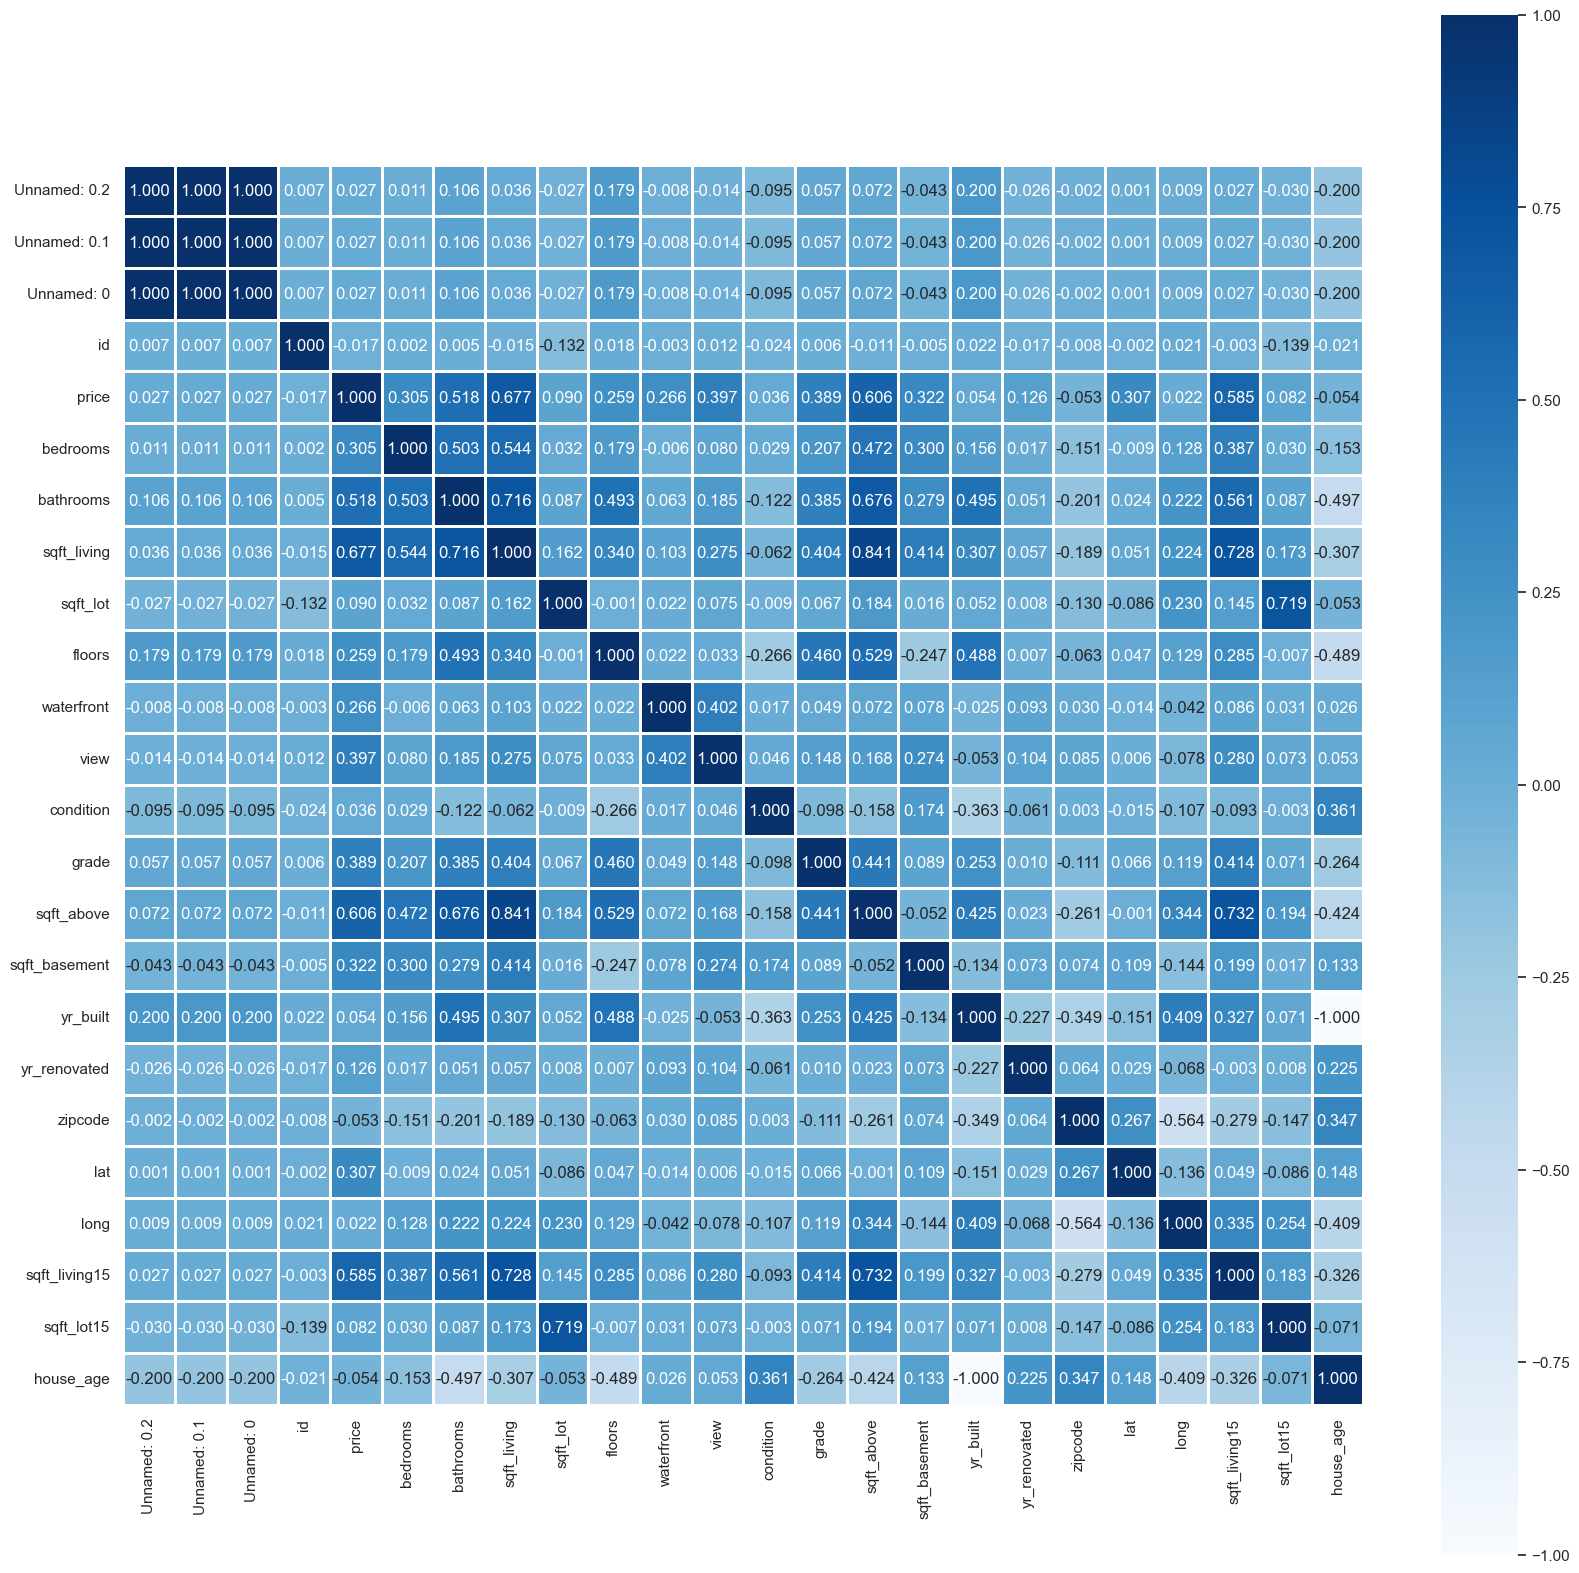

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f", cmap="Blues", linewidths=1, square=True)
plt.show()

To see what features have the most correlation with the outcome, we can simply use the price row in `df.corr()`.

In [15]:
price_corr = df.corr(numeric_only=True)["price"].drop("price")
price_corr = price_corr[abs(price_corr) > 0.1].sort_values(ascending=False)
price_corr_display = price_corr[abs(price_corr) > 0.31].sort_values(ascending=False)
display(price_corr)

sqft_living      0.676542
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.517952
view             0.397346
grade            0.389227
sqft_basement    0.321825
lat              0.306919
bedrooms         0.304521
waterfront       0.266331
floors           0.258603
yr_renovated     0.126442
Name: price, dtype: float64

As we can see, square foot-related features namely `sqft_living`, `sqft_above` and `sqft_living15`, has the most correlation with the outcome.

### Q1-4. Plot unique values for each feature of last part.

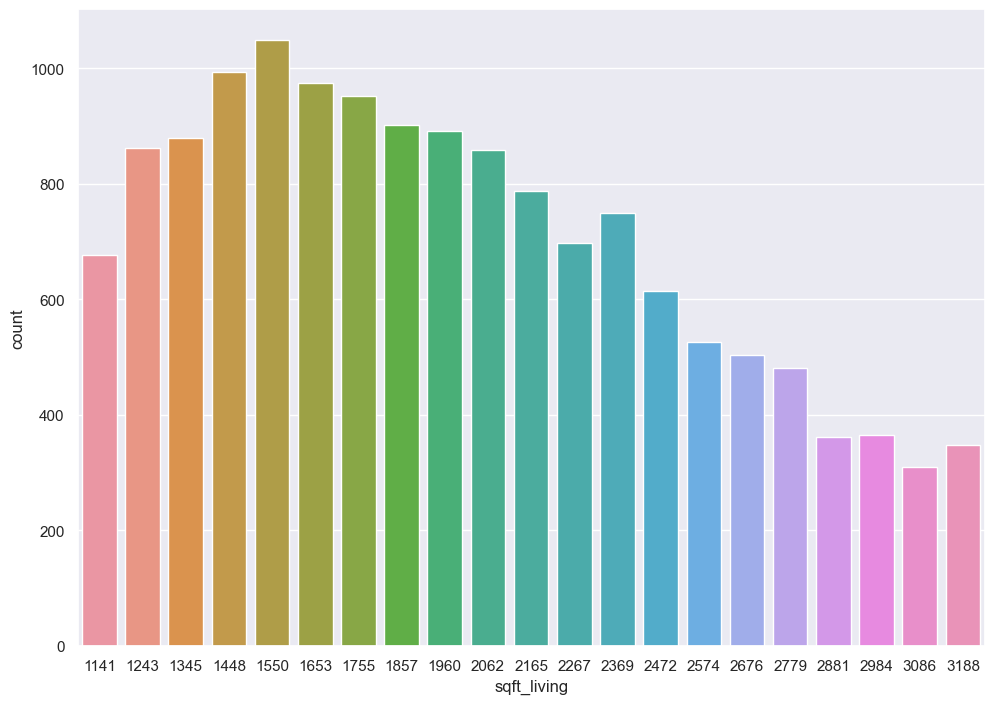

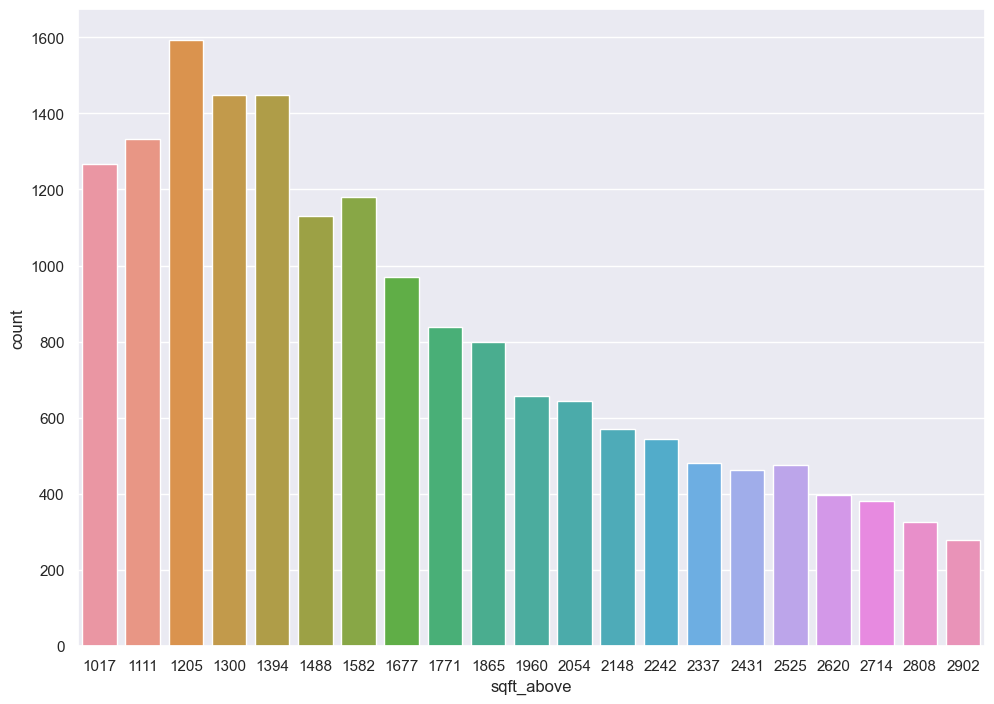

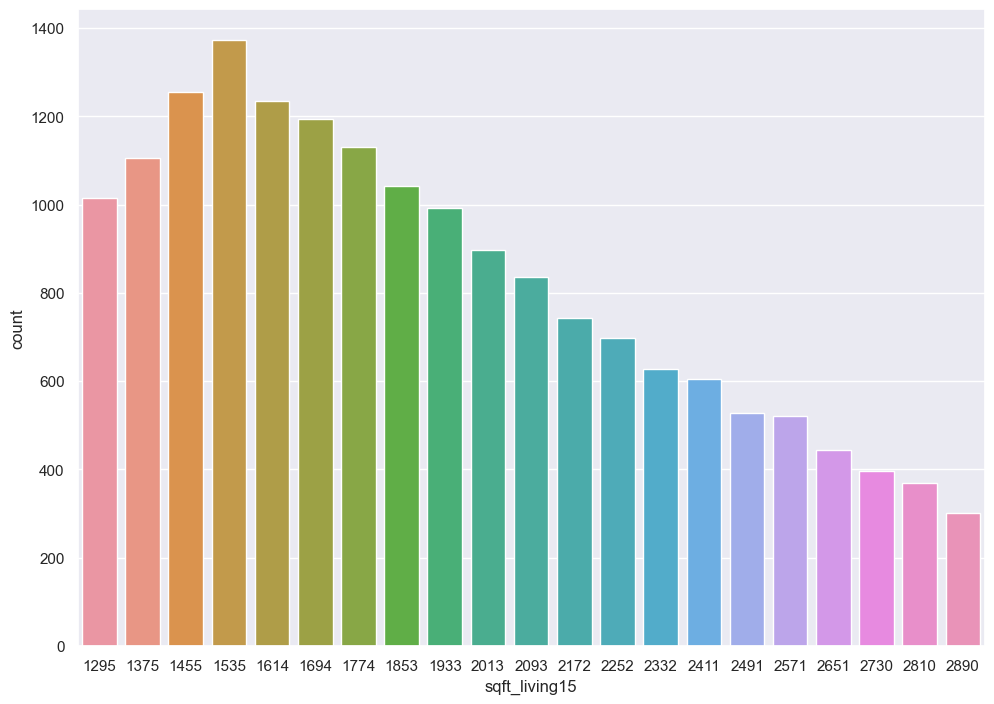

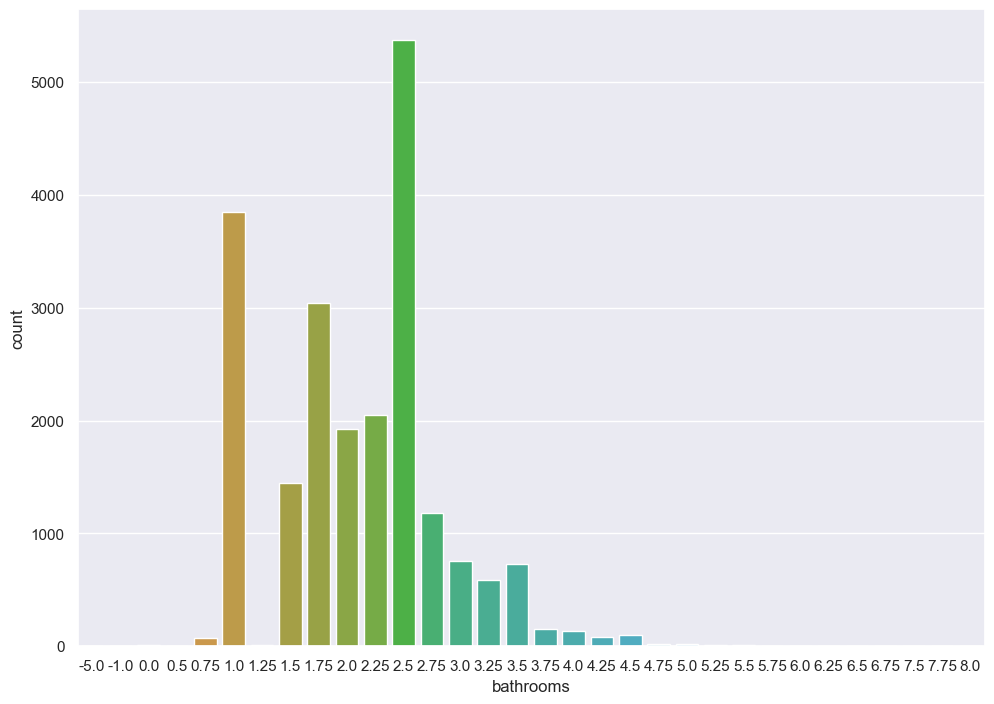

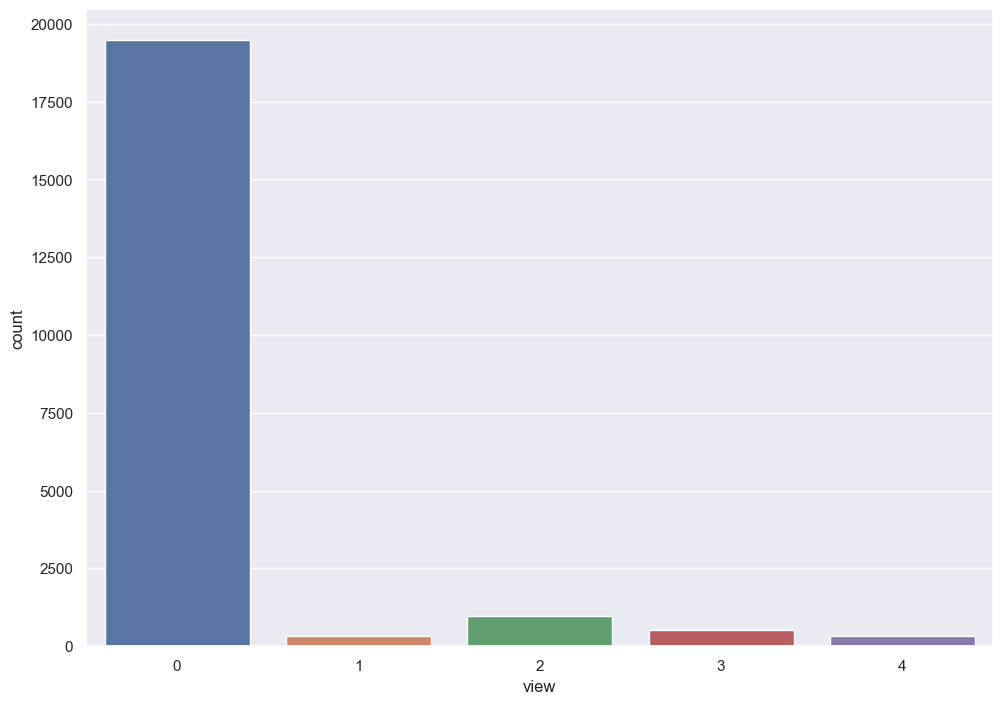

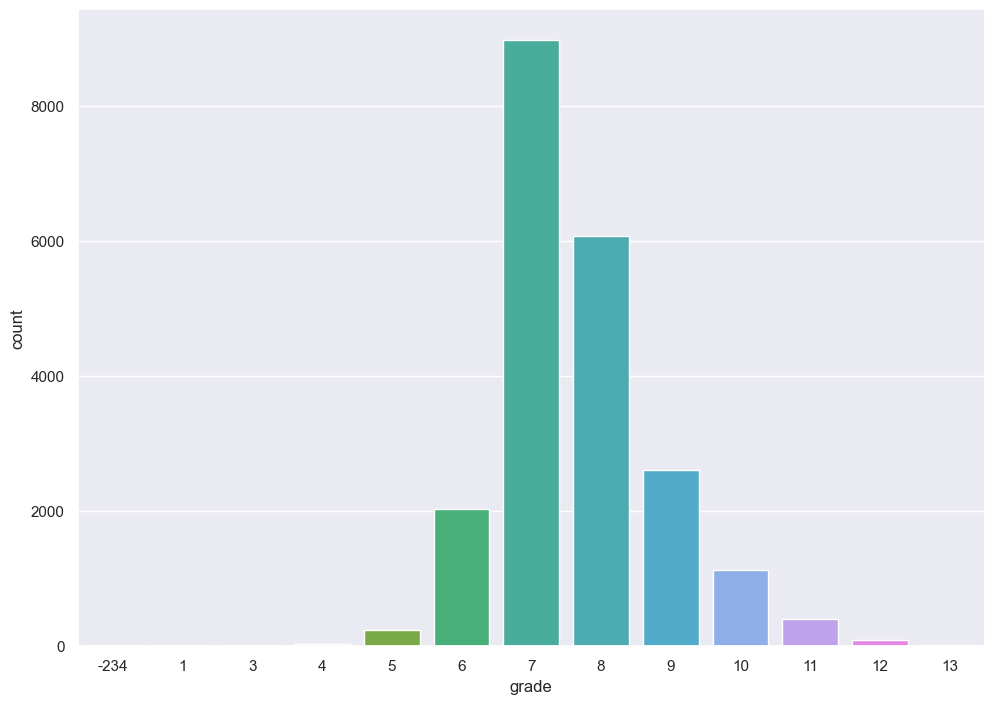

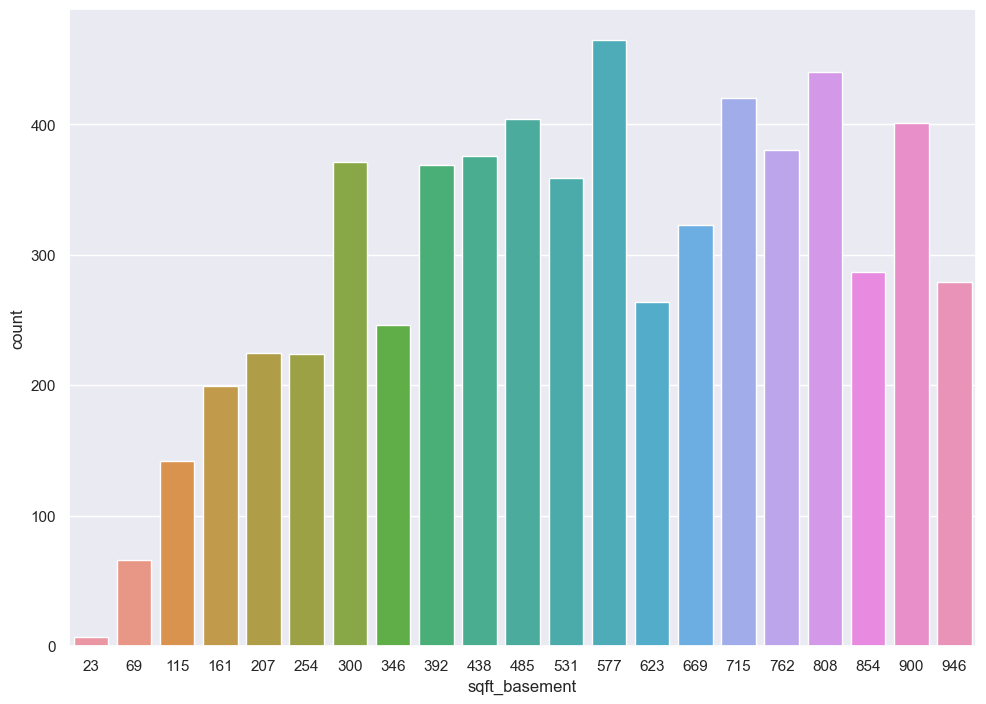

In [16]:
NUM_OF_INTERVALS = 20
df_backup = deepcopy(df)

sns.set(rc={'figure.figsize':(11.7,8.27)})

for col in price_corr_display.index.to_list():
    if df[col].quantile(0.9) - df[col].quantile(0.1) < 20:
        sns.countplot(x=col, data=df)
        plt.show()
    else:
        intervals = pd.interval_range(start=df[col].quantile(0.1), end=df[col].quantile(0.9), periods=NUM_OF_INTERVALS + 1)
        interval_tuples = [(interval.left, interval.right) for interval in intervals]
        bins = pd.IntervalIndex.from_tuples(interval_tuples)
        df[col] = pd.cut(df[col], bins)
        ax = sns.countplot(x=col, data=df)
        ax.set_xticklabels([f'{int(np.mean(interval))}' for interval in interval_tuples])
        plt.show()


### Q1-5. Plotting the relationship between the features using hexbin and scatter plots.

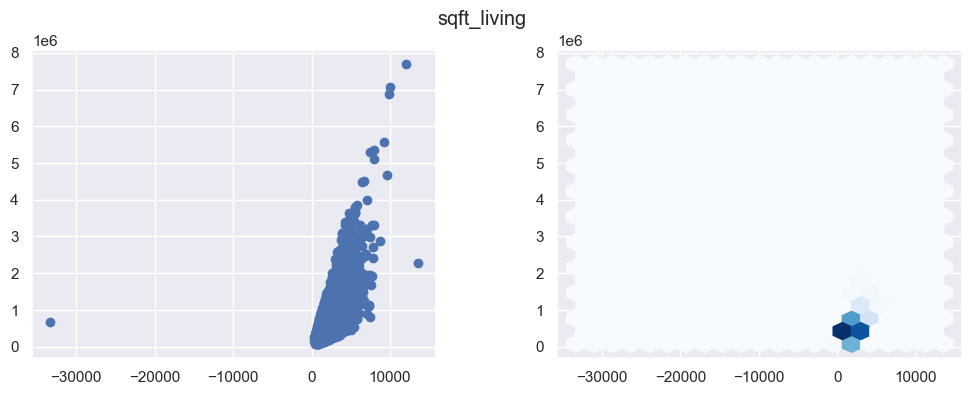

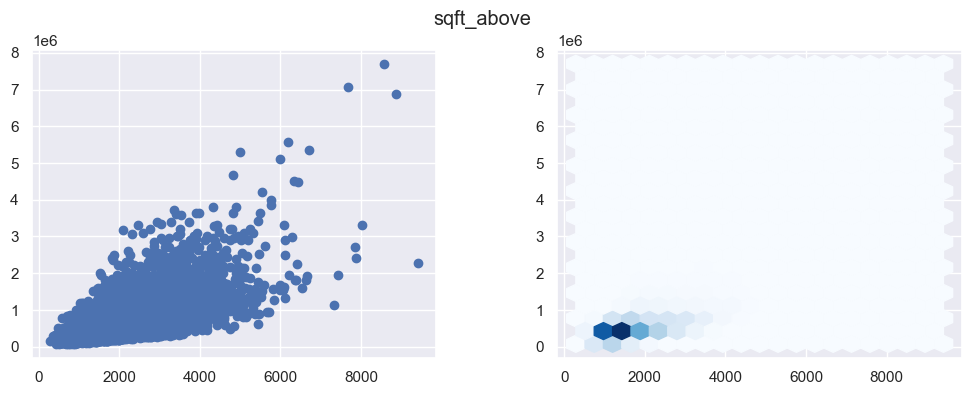

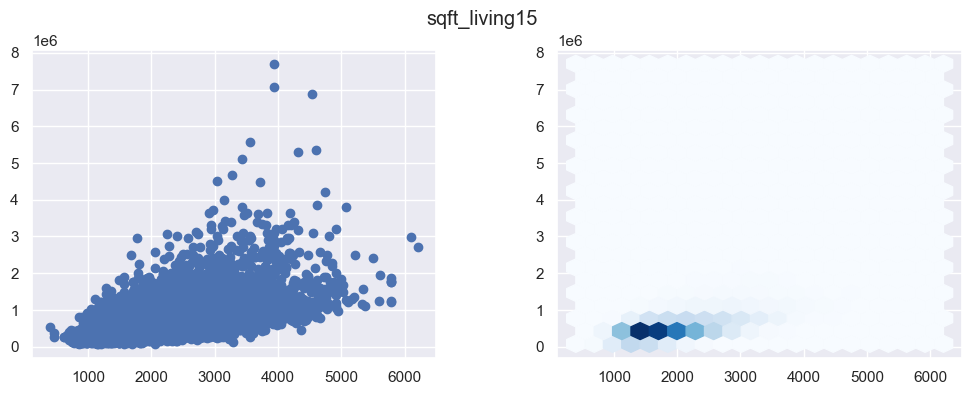

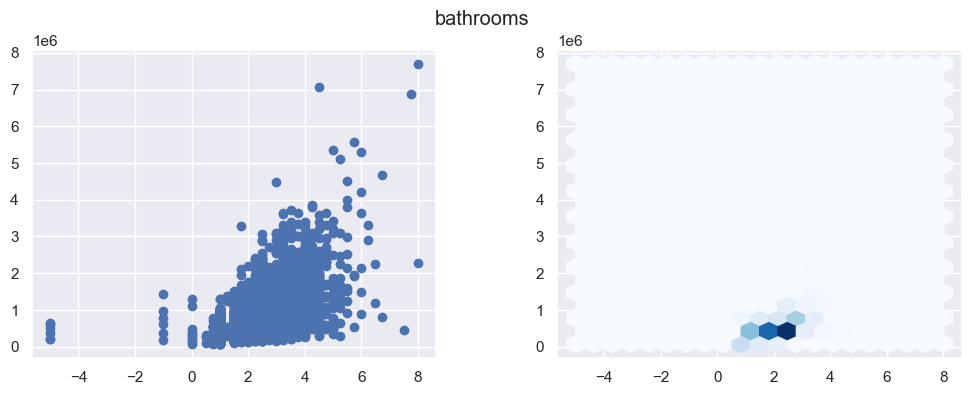

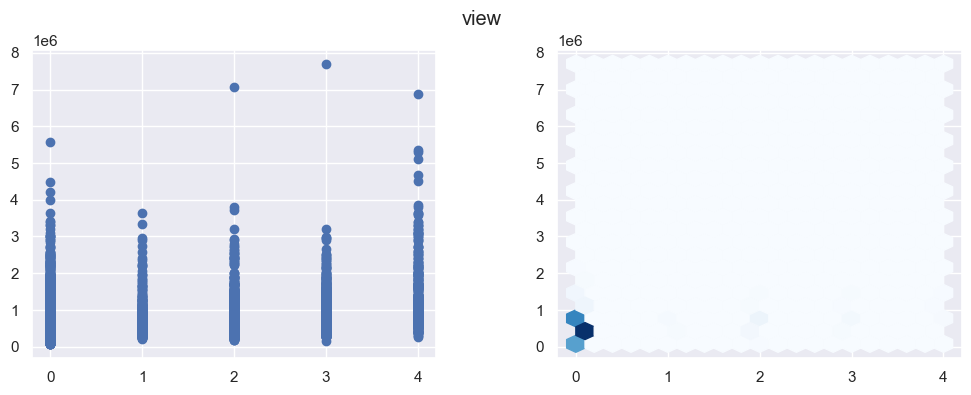

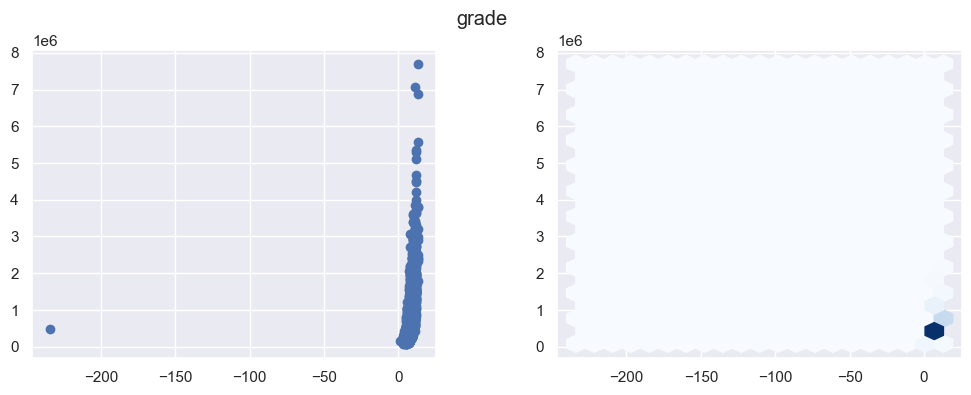

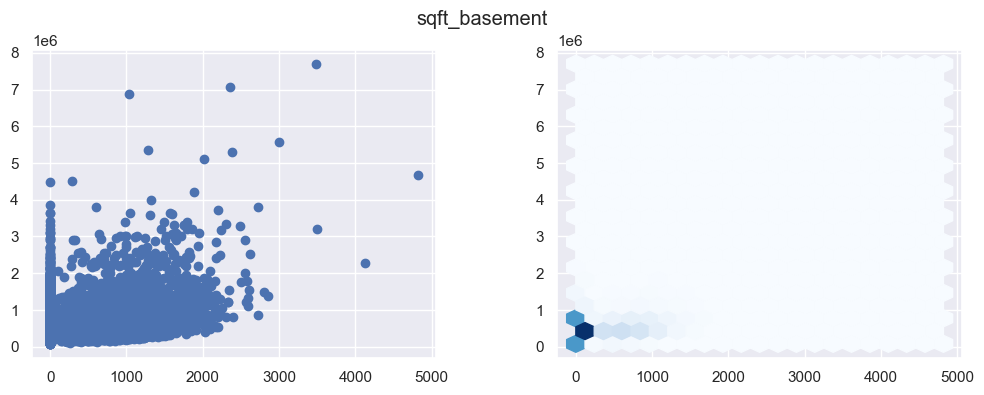

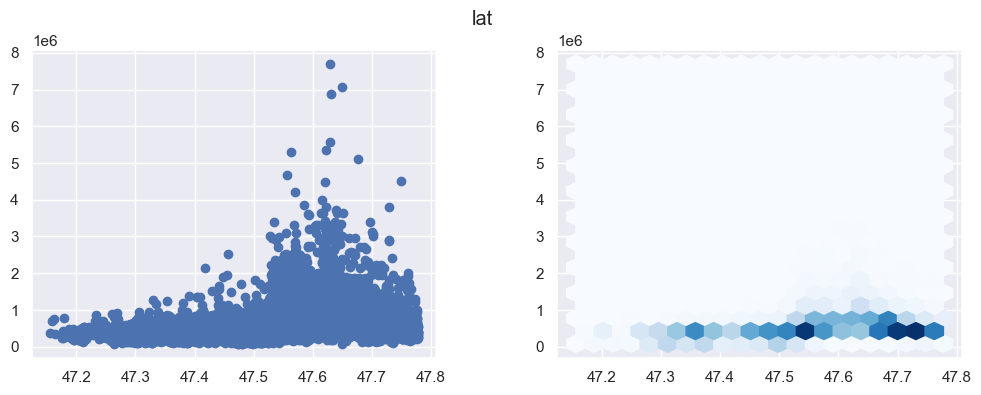

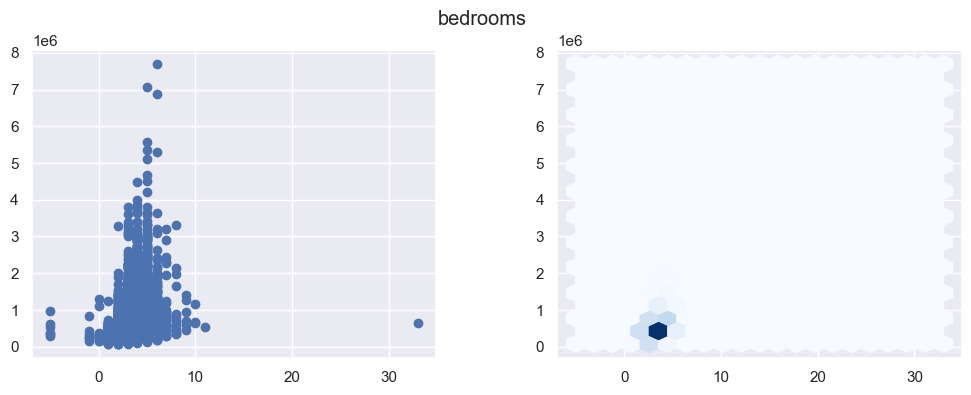

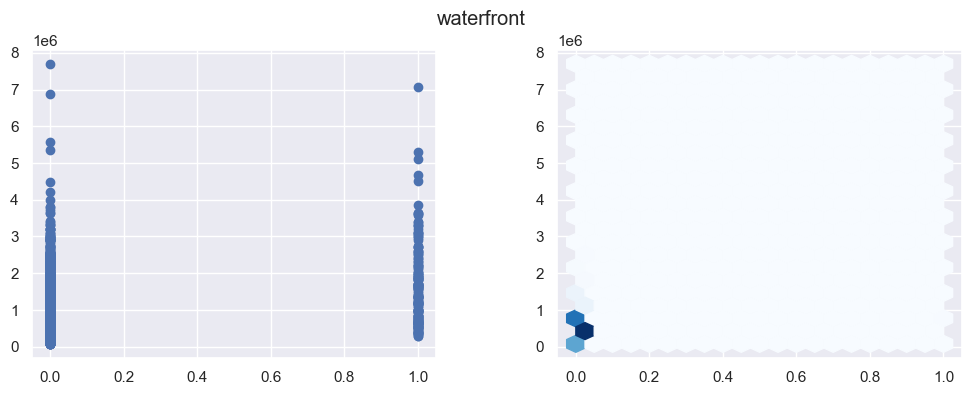

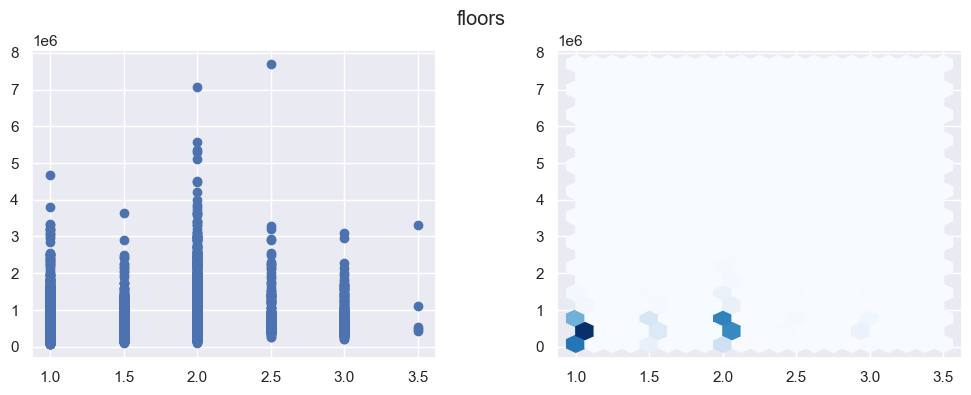

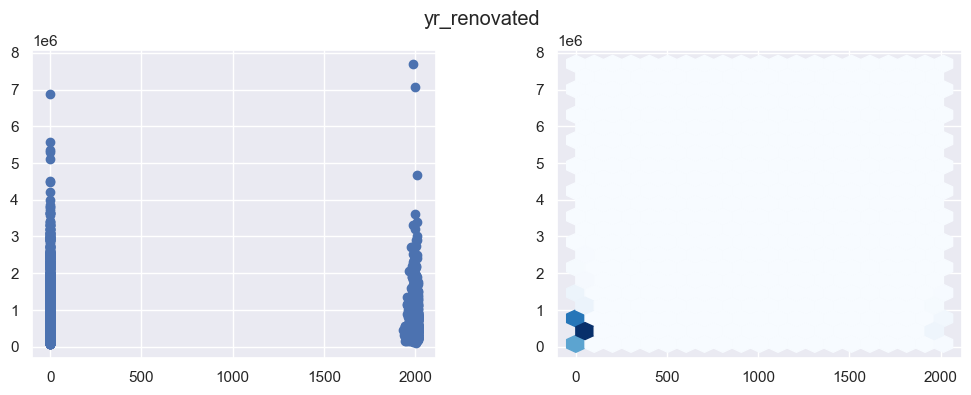

In [17]:
df = deepcopy(df_backup)

def plot_corr_scatter_hexbin(col):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
    plt.suptitle(col)
    axs[0].scatter(df[col], df["price"])
    axs[1].hexbin(df[col], df["price"], gridsize=20, cmap="Blues")
    plt.subplots_adjust(wspace=0.3)
    plt.show()

for col in price_corr.index:
    plot_corr_scatter_hexbin(col)

### Q1-6. Use other methods to analyze the data.

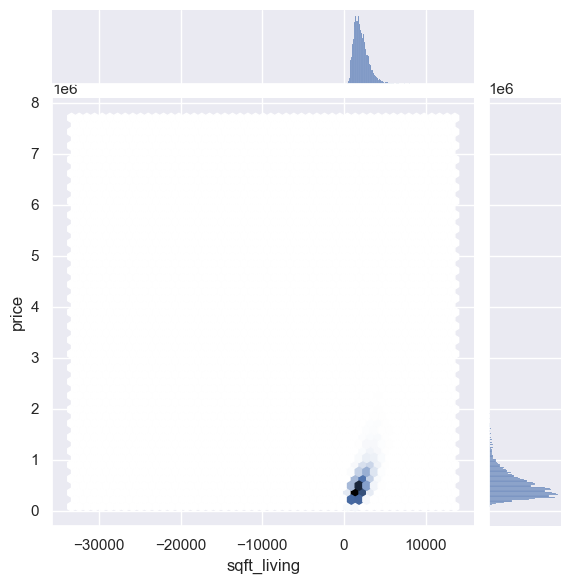

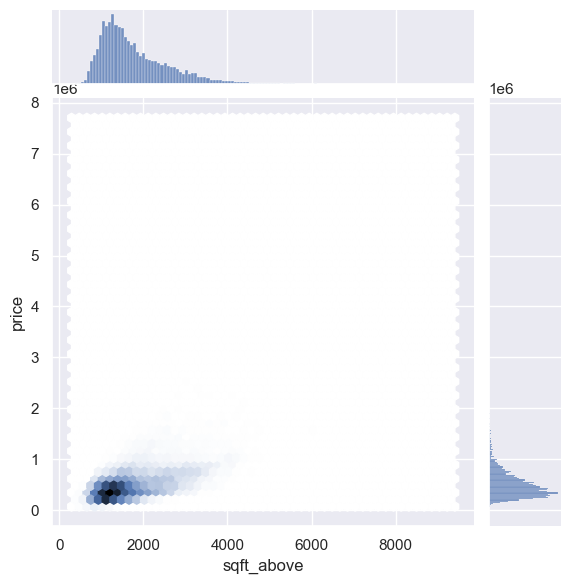

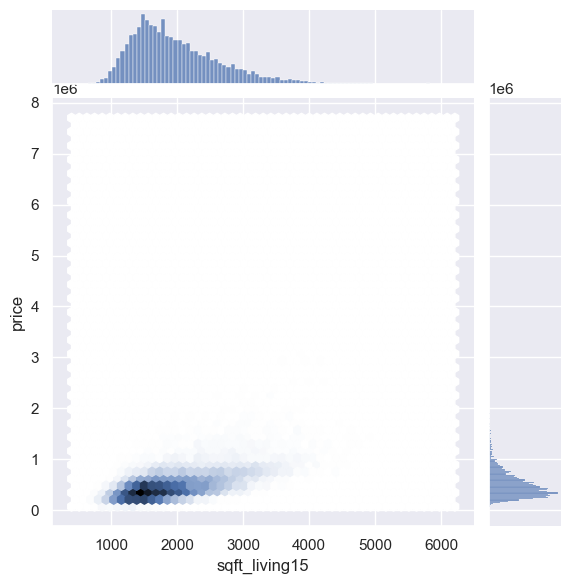

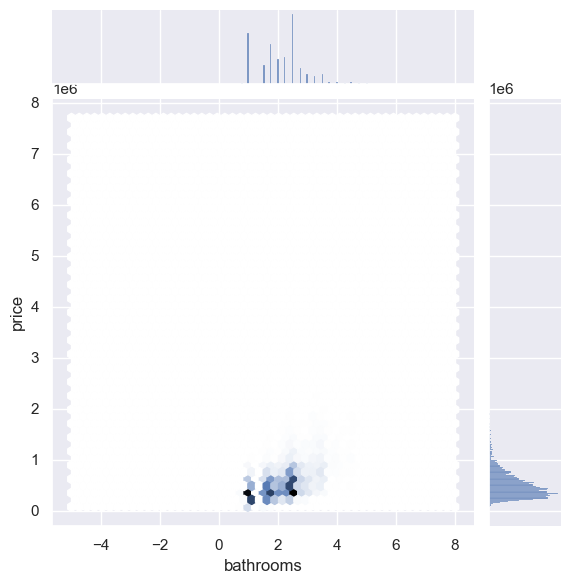

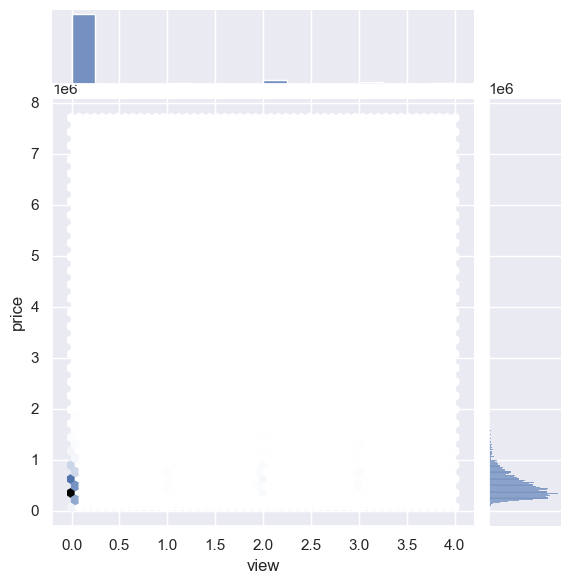

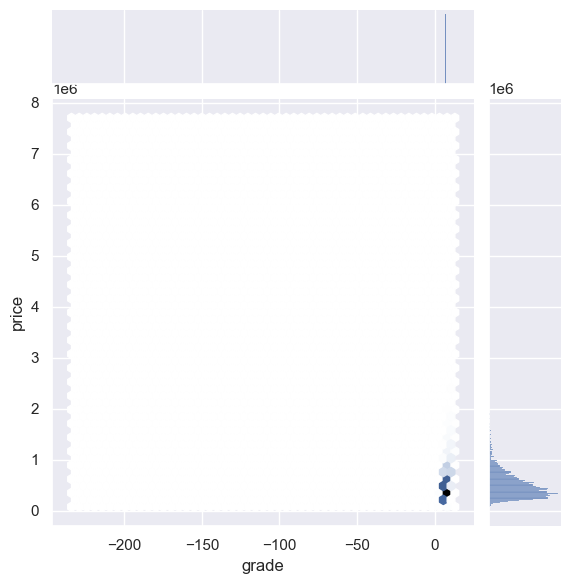

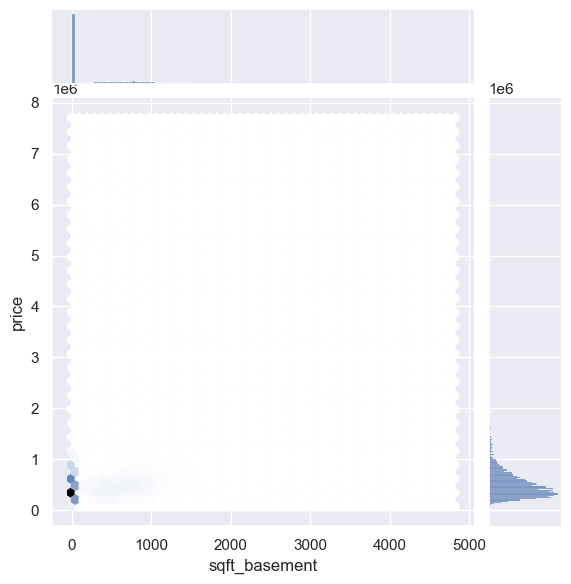

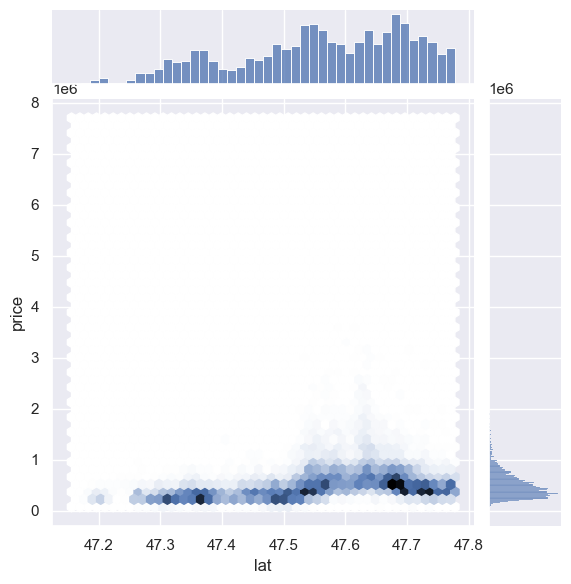

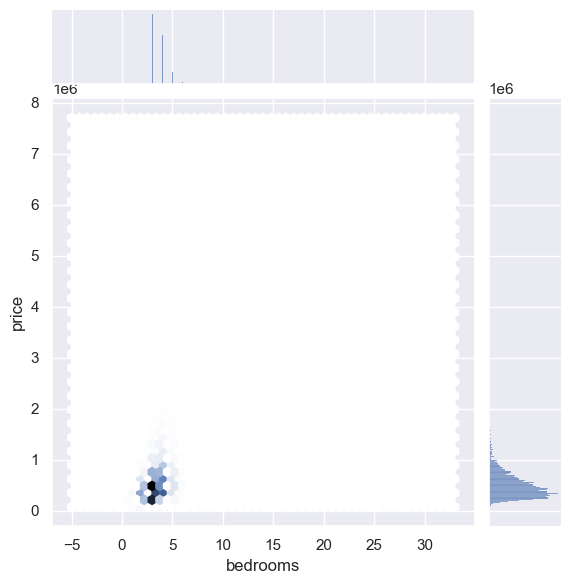

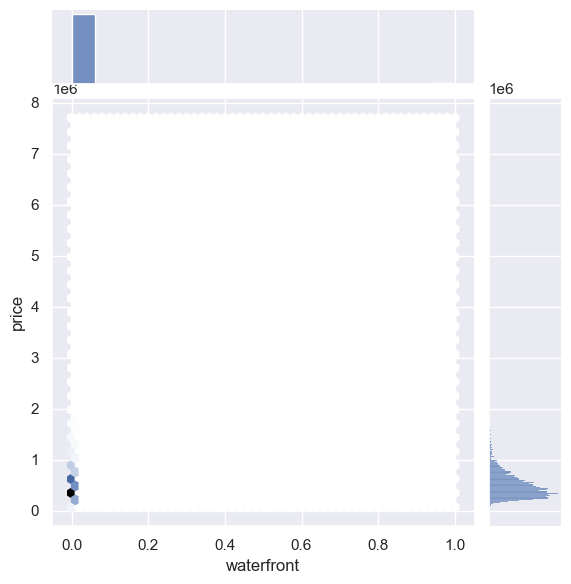

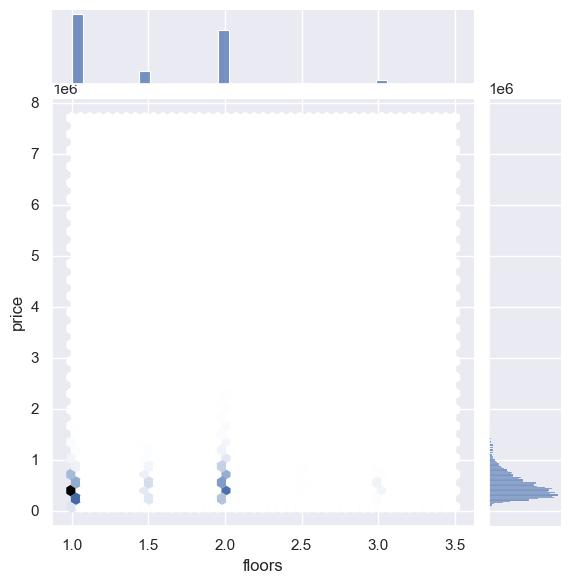

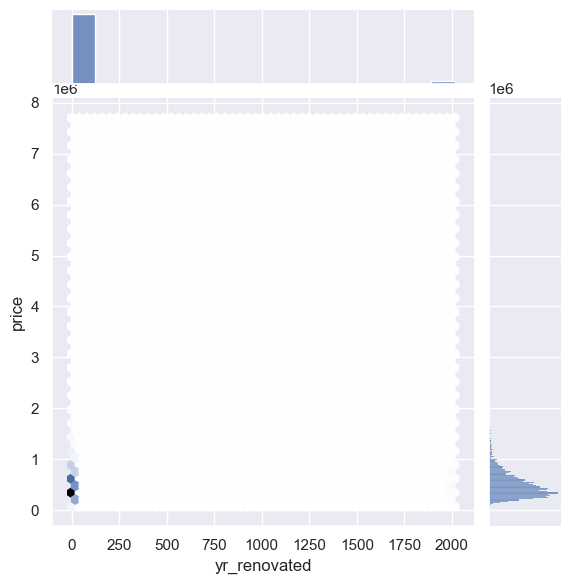

In [18]:
def plot_corr_joint(col):
    sns.jointplot(x=col, y="price", data=df, kind="hex")

for col in price_corr.index:
    plot_corr_joint(col)

## Part 2. Preprocessing

First we need to delete some invalid values such as negative values for number of bathrooms and so forth.

In [19]:
negative_columns = ["bedrooms", "bathrooms", "sqft_living", "grade"]
df[negative_columns] = np.where(df[negative_columns] < 0, np.nan, df[negative_columns])

### Q2-1. How to handle missing values.
Missing values in machine learning projects can be a significant hindrance to accurate results. However, there are multiple ways to deal with it during the preprocessing stage to minimize their impact. 

---

**Imputation:** is the process of replacing missing values with a substitution.
  
One such technique is mean imputation, where missing values are replaced by the mean value of the non-missing data. Similarly, the median and mode of the non-missing data could be used as a substitute. Alternatively, missing values could be replaced with the value of the previous or the next observation - called forward-fill and backward-fill, respectively. Other ways can be to predict or simply put a random value into the data.

  - *Filling with Mean:*  
    Using the average to fill missing values is simple to do and the mean is a good representative of the data as a whole.  
    But sometimes it may not make sense and be impossible to use for a column.
  - *Filling with Median:*  
    The outlier data can affect the mean negatively.  
    In such cases, it may be better to use the median which is not affected by outliers.
  - *Filling with Mode:*  
    Mean and median do not work with categorical data.  
    Using the mode can be a alternative for such data.
  - *Random Fill:*  
    In this method we fill using random values, mostly in the range of the column's minimum and maximum data, or between the categories.
  - *Predicting:*  
    A more advanced method is to have a way of predicting what the missing value should be based on the other properties of the row.
  - *Forward-fill and Backward-fill:* 
    In this method we fill the missing values with next or previous observation respectively

A more advanced approach is an imputation method using model-based techniques, such as k-NN imputation or MICE (Multiple Imputation by Chained Equations). While the former fills the missing data based on the k nearest neighbors, the latter fits the observed data into a regression model before imputing missing values with the help of this model.

---

**Dropping**: Another option is to remove any observations that contain missing values. This choice should be made with careful consideration, as it can reduce the size of the data and impact its representativeness. There are two main ways, dropping columns and dropping rows.  

  - *Dropping Columns:*  
    In this method we remove any column that has missing values in it.  
    This is usually not wanted because we potentially losing a lot of data.  
    This method should only be considered on columns that have too many missing values; and in fact, its actually the better thing to do in such cases because there is not much data to fill it with good precision.
  - *Dropping Rows:*  
    Works similarly to dropping columns.  
    If we remove all rows that have missing values, if a column is all missing, then all of the rows will be gone.  
    This method should also only be considered on rows that have most of their properties missing.

---

Finally, in some cases where missing data is limited, one could choose to ignore these values altogether and proceed with the analysis. However, before doing that, it is essential to determine whether the missingness is random or non-random. 

These are just a few possible ways to handle missing data during the preprocessing stage of a machine learning project. Depending on the specific case, there may be other methods that could be more effective.

### Q2-2. Handling missing values

In [20]:
missing_values(df)

,Missing,Percentage
Unnamed: 0.2,0,0.000000
Unnamed: 0.1,0,0.000000
Unnamed: 0,0,0.000000
id,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,12,0.000555
bathrooms,12,0.000555
sqft_living,3086,0.142784
sqft_lot,0,0.000000


As we can see `yr_built` and `sqft_living` and `floors` has the most missing values.  
Filling with median is chosen, this is to not get affected by outliers and also not be fractional.

In [21]:
df.fillna(df.median(numeric_only=True), inplace=True)
missing_values(df)

,Missing,Percentage
Unnamed: 0.2,0,0.0
Unnamed: 0.1,0,0.0
Unnamed: 0,0,0.0
id,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0


As an alternative method we delete rows that have more than two NaN values, and then use KNNImputer to fill them.

In [22]:
missing = df_backup[df_backup.isna().sum(axis=1) > 2]
df_imputed = deepcopy(df_backup)
df_imputed.drop(missing.index, inplace=True)
df_imputed = df_imputed.drop(["date", "location", "style"], axis=1)
df_imputed.reset_index(drop=True, inplace=True)
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df_imputed)
imputed = pd.DataFrame(imputed, columns=df_imputed.columns)
imputed[negative_columns] = np.where(imputed[negative_columns] < 0, np.nan, imputed[negative_columns])

In [23]:
imputed.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21517.000000,21517.000000,21517.000000,2.151700e+04,2.151700e+04,21505.000000,21505.000000,21515.000000,2.151700e+04,21517.000000,21517.000000,21517.000000,21517.000000,21516.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000
mean,10801.298276,10801.298276,10801.298276,4.578311e+09,5.398925e+05,3.370425,2.114532,2073.327186,1.510374e+04,1.492234,0.007482,0.233908,3.409676,7.656163,1788.069712,291.953032,1970.969875,83.941999,98077.949482,47.560108,-122.213883,1986.143421,12762.047683,51.005019
std,6239.025202,6239.025202,6239.025202,2.876253e+09,3.667220e+05,0.928859,0.770085,884.841158,4.145542e+04,0.519972,0.086179,0.765487,0.651043,1.175557,827.953548,439.960247,28.480347,400.625805,53.496461,0.138614,0.140867,685.252463,27280.474820,29.375067
min,0.000000,0.000000,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5400.000000,5400.000000,5400.000000,2.123049e+09,3.215000e+05,3.000000,1.750000,1450.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000,25.000000
50%,10799.000000,10799.000000,10799.000000,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.615000e+03,1.400000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,47.000000
75%,16204.000000,16204.000000,16204.000000,7.305900e+09,6.450000e+05,4.000000,2.500000,2519.500000,1.067900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1995.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10080.000000,71.000000
max,21612.000000,21612.000000,21612.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


In [24]:
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.00000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.370795,2.114815,2056.708555,1.510697e+04,1.493916,0.007542,0.234303,3.409430,7.656873,1788.390691,286.322722,1971.48184,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.929856,0.769909,851.633193,4.142051e+04,0.498677,0.086517,0.766318,0.650743,1.175459,828.090978,440.112814,27.26682,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.00000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1502.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1955.00000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.00000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2420.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1992.00000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.00000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


As it is shown above, both the `mean` and `std` of the features remained almost the same as the old data after filling the missing values. So, we can use the `KNNImputer` method to fill the missing values.   

By using the `mean` method, the `mean` of the new dataset will be the same as the old one, but the `std` will change a lot. But `median` will have better performance. But we will continue with the module that we got from filling with median since we need non-numerical variables too.

### Q2-3. Normalization and Standardization, should we use them?

Normalization means scaling the values of the features to a fixed range. For example, we can scale the values of the features to the range of [0, 1] or [-1, 1]. This method is useful when we have no outliers and the data lies in a fixed range. We can use the `MinMaxScaler` method to do this. We can't use normalization when we are not using algorithms such as `KNN` or `Neural Networks` which are based on distance. Below is the formula for the `MinMaxScaler` method:

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
Standardization means scaling the values of the features to have a mean of 0 and a standard deviation of 1. This method is useful when we have features with different means and standard deviations. We can use the `StandardScaler` method to do this. Below is the formula for the `StandardScaler` method:

$$X_{std} = \frac{X - \mu}{\sigma}$$  

To answer when we need to do them I quote from [this link](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)  
**Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.  
**Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.


In [25]:
class DataScaler:
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.numeric_cols = df.select_dtypes(include="number")
        self.scaler_std = StandardScaler()
        self.scaler_norm = MinMaxScaler()

    def standardization(self, exclude_cols: list = []):
        self.df[self.numeric_cols.columns] = self.scaler_std.fit_transform(self.numeric_cols)
        self.df[exclude_cols] = self.numeric_cols[exclude_cols]

    def normalization(self, exclude_cols: list = []):
        self.df[self.numeric_cols.columns] = self.scaler_norm.fit_transform(self.numeric_cols)
        self.df[exclude_cols] = self.numeric_cols[exclude_cols]
        
scalar = DataScaler(df)


Now we check the distribution of features to decide between normalizing and standardizing.

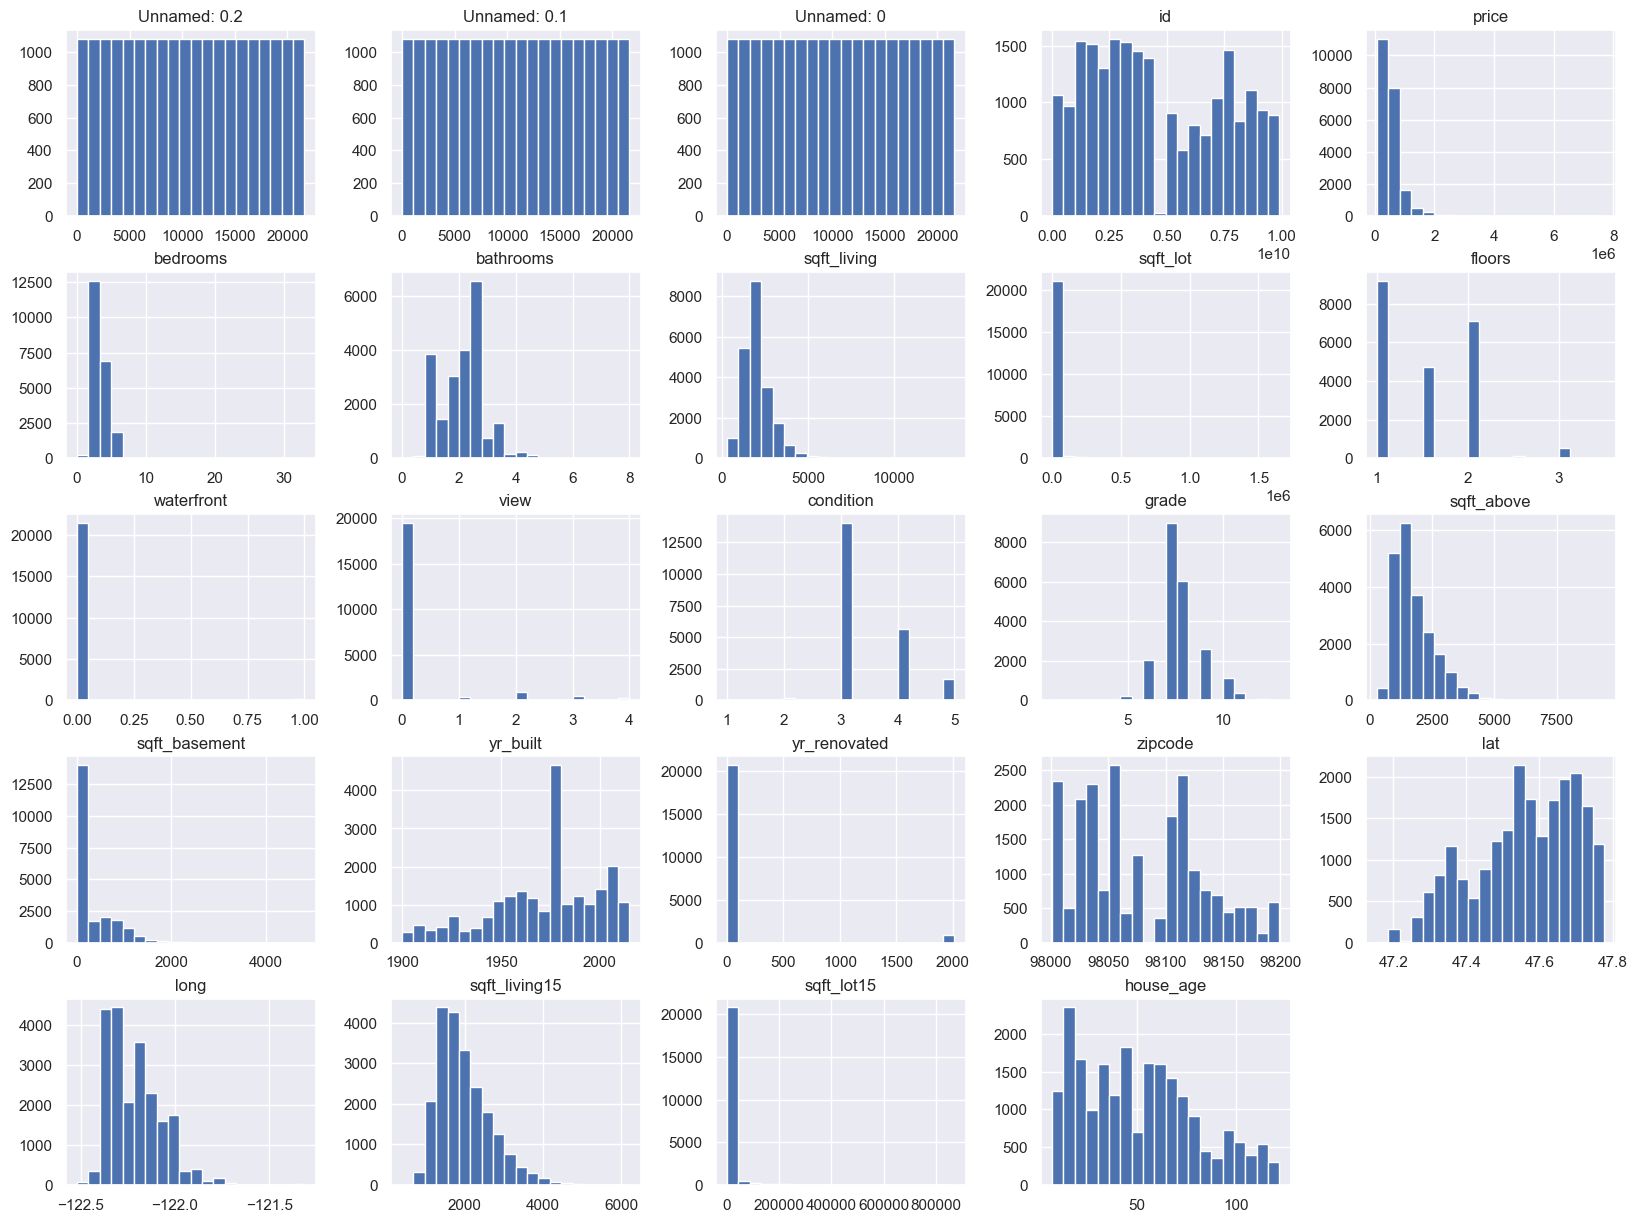

In [26]:
scalar.df.hist(bins=20, figsize=(20,15))
plt.show()

Since the important features (i.e. the one with high correlation with price feature) are mostly normally distributed, we use standardization.

In [27]:
scalar.normalization(exclude_cols=["price"])
scalar.df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.500000,0.500000,0.500000,0.462602,5.401822e+05,0.102145,0.264352,0.133336,0.008836,0.197566,0.007542,0.058576,0.602357,0.554739,0.164297,0.059403,0.621581,0.041887,0.388585,0.650076,0.253408,0.273198,0.013919,0.382564
std,0.288695,0.288695,0.288695,0.290592,3.673622e+05,0.028177,0.096239,0.064274,0.025091,0.199471,0.086517,0.191579,0.162686,0.097955,0.090799,0.091310,0.237103,0.199345,0.270227,0.222879,0.116967,0.117947,0.031364,0.255421
min,0.000000,0.000000,0.000000,0.000000,7.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.214370,3.219500e+05,0.090909,0.218750,0.091472,0.002738,0.000000,0.000000,0.000000,0.500000,0.500000,0.098684,0.000000,0.478261,0.000000,0.161616,0.506836,0.158638,0.187747,0.005111,0.156522
50%,0.500000,0.500000,0.500000,0.394376,4.500000e+05,0.090909,0.281250,0.123019,0.004300,0.200000,0.000000,0.000000,0.500000,0.500000,0.139254,0.000000,0.652174,0.000000,0.323232,0.668972,0.240033,0.247978,0.008005,0.347826
75%,0.750000,0.750000,0.750000,0.738246,6.450000e+05,0.121212,0.312500,0.160755,0.006159,0.400000,0.000000,0.000000,0.750000,0.583333,0.210526,0.114108,0.800000,0.000000,0.590909,0.839794,0.327243,0.337463,0.010835,0.556522
max,1.000000,1.000000,1.000000,1.000000,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


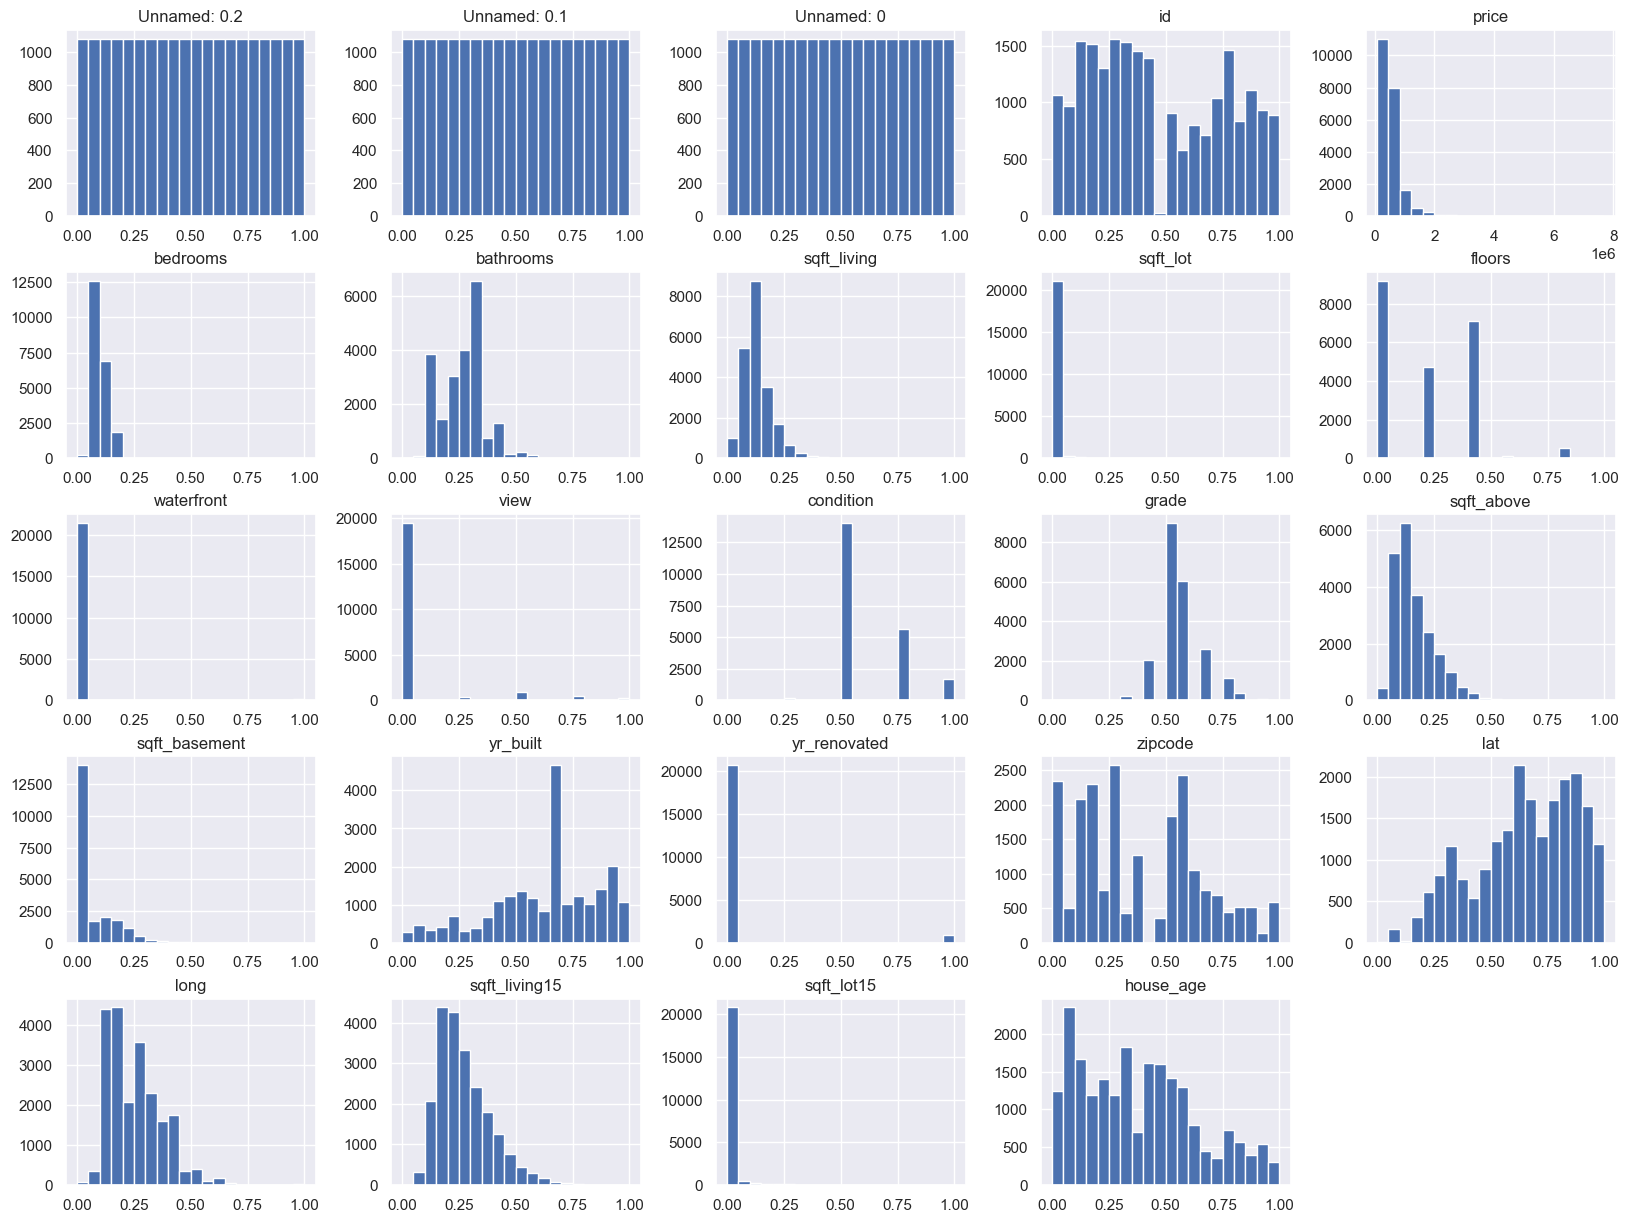

In [28]:
scalar.df.hist(bins=20, figsize=(20,15))
plt.show()

### Q2-4. Categorical values and encoding.

There are many ways to encode the categorical features. Some of them are as follows:

* `Label Encoding`: Assign a number to each category.  
This method is useful when the categories have an order. This is substituting each possible value of a categorical feature with a corresponding number. While label encoding is very simple, it is not always ideal because the numbers do not mean anything and can cause issues if used for calculating distance.  
  > Category 1: 0  
  > Category 2: 1  
  > Category 3: 2

* `One-Hot Encoding`: Create a new feature for each category.
This method is useful when the categories don't have an order. It is the most useful method for the algorithms that use the distance between the data points, such as `KNN`. In this method, an additional feature is added for each categorical value and is marked 0 or 1. While this encoding is more proper, it adds a lot of new binary features which use more memory and can slow the dataset down.
    > Category 1: 1, 0, 0  
    > Category 2: 0, 1, 0  
    > Category 3: 0, 0, 1


* `Binary Encoding`: Encode the categories using binary numbers.
This method is useful when the categories don't have an order. It is somehow similar to the `One-Hot Encoding` method but it uses less memory.
    > Category 1: 00  
    > Category 2: 01  
    > Category 3: 10

* `Frequency Encoding`: Encode the categories using the frequency of the categories.
This method is useful when the categories don't have an order. 
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.25

* `Target Encoding`: This is the process of replacing a categorical value with the mean of a target variable.  
  To do this, the data is grouped by each categorical value, and the average of a chosen target variable is calculated for that group. If the target is numerical, the categorical values are replaced with their corresponding average of the target. 
   If the target is categorical, the values are replaced with their corresponding probability of the target. 
This method is useful when the categories don't have an order. 
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.75

In [29]:
class CategoricalEncoder:
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.cat_cols = df.select_dtypes(include=["category", "object"])
        
        self.encoders = {
            "label": cat_enc.OrdinalEncoder(cols=self.cat_cols.columns),
            "one-hot": cat_enc.OneHotEncoder(cols=self.cat_cols.columns, use_cat_names=True),
            "target": cat_enc.TargetEncoder(cols=self.cat_cols.columns, min_samples_leaf=2, smoothing=1.1),
            "frequency": cat_enc.CountEncoder(cols=self.cat_cols.columns),
            "binary": cat_enc.BinaryEncoder(cols=self.cat_cols.columns),
        }

    def encode(self, mode: str, target: str = None):
        if mode != "target":
            self.df[self.cat_cols.columns] = self.encoders[mode].fit_transform(self.cat_cols)
        else:
            self.df[self.cat_cols.columns] = self.encoders[mode].fit_transform(self.cat_cols, self.df[target])

encoder = CategoricalEncoder(df)
encoder.encode(mode="label")
display(df)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0.000000,0.000000,0.000000,0.720103,1,221900.0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,1,1,0.521739
1,0.000046,0.000046,0.000046,0.647853,2,538000.0,0.090909,0.28125,0.172075,0.004072,0.2,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.652174,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,1,2,0.556522
2,0.000093,0.000093,0.000093,0.568795,3,180000.0,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,2,3,0.713043
3,0.000139,0.000139,0.000139,0.251157,2,604000.0,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,3,4,0.434783
4,0.000185,0.000185,0.000185,0.197333,4,510000.0,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,1,5,0.243478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.999815,0.999815,0.999815,0.026467,233,360000.0,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,1,3,0.052174
21609,0.999861,0.999861,0.999861,0.666639,53,400000.0,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,1,5,0.008696
21610,0.999907,0.999907,0.999907,0.153783,98,402101.0,0.060606,0.09375,0.055094,0.000503,0.2,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.652174,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,1,2,0.052174
21611,0.999954,0.999954,0.999954,0.029327,131,400000.0,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,2,1,0.095652


###  Q2-5. Removing columns.

Some columns like id and Unnamed are unique and wont help us, others like longitude and latitude and zipcode are not crucial in determining price so we drop them. And also features that have low correlation with target.

In [30]:
df = df[price_corr.index.union(["price"])]
df.head(10)

,bathrooms,bedrooms,floors,grade,lat,price,sqft_above,sqft_basement,sqft_living,sqft_living15,view,waterfront,yr_renovated
0,0.12500,0.090909,0.0,0.500000,0.571498,221900.0,0.097588,0.000000,0.067170,0.161934,0.0,0.0,0.000000
1,0.28125,0.090909,0.2,0.500000,0.908959,538000.0,0.206140,0.082988,0.172075,0.222165,0.0,0.0,0.988089
2,0.12500,0.060606,0.0,0.416667,0.936143,180000.0,0.052632,0.000000,0.036226,0.399415,0.0,0.0,0.000000
3,0.37500,0.121212,0.0,0.500000,0.586939,604000.0,0.083333,0.188797,0.126038,0.165376,0.0,0.0,0.000000
4,0.25000,0.090909,0.0,0.583333,0.741354,510000.0,0.152412,0.000000,0.104906,0.241094,0.0,0.0,0.000000
5,0.56250,0.121212,0.0,0.833333,0.804568,1230000.0,0.394737,0.317427,0.387170,0.750473,0.0,0.0,0.000000
6,0.28125,0.090909,0.4,0.500000,0.247386,257500.0,0.156250,0.000000,0.107547,0.316469,0.0,0.0,0.000000
7,0.18750,0.090909,0.2,0.500000,0.407914,291850.0,0.084430,0.000000,0.058113,0.215281,0.0,0.0,0.000000
8,0.12500,0.090909,0.0,0.500000,0.573267,229500.0,0.083333,0.151452,0.123019,0.237653,0.0,0.0,0.000000
9,0.31250,0.090909,0.4,0.500000,0.341805,323000.0,0.175439,0.000000,0.123019,0.342626,0.0,0.0,0.000000


### Q2-6. Splitting the dataset into train and test sets.
There are some ways to split the dataset into train and test sets. Some of them are as follows:

- Randomly split the dataset into train and test sets
    - This method is the most common method. But it has a problem. If we split the dataset randomly, the train and test sets may not have the same distribution.   
- Split the dataset based on the time
    - This method is useful when we have a time series dataset. But it is not useful in this case.  
- Split the dataset based on the target
    - This method is useful when we have an imbalanced dataset.
- Cross-validation 
    - Which groups the data into *k* parts, and chooses one of them at each iteration and uses it as the test data, while using the rest as training data. *K-fold cross-validation* is simply splitting into *k* parts.

Here we use the first method. And there are also several percentage for dividing, we use 80-20 here.

In [31]:
class DataSplitter:
    def __init__(self, df: pd.DataFrame, train_percent: float = 0.8):
        self.data = df[df.columns.difference(["price"])]
        self.outcome_data = df["price"]
        self.__split(train_percent)

    def __split(self, train_percent: float):
        train_feat, test_feat, train_out, test_out = train_test_split(
                                                    self.data, self.outcome_data, train_size=train_percent, random_state=1)
        self.data_train = train_feat
        self.data_test = test_feat
        self.outcome_train = train_out
        self.outcome_test = test_out
        
    def classify_price_level(self):
        median_data = self.outcome_train.median()
        self.outcome_train_class = self.outcome_train.apply(lambda x: "HIGH" if x < median_data else "LOW")
        median_test = self.outcome_test.median()
        self.outcome_test_class = self.outcome_test.apply(lambda x: "HIGH" if x < median_test else "LOW")
        
    def binary_price_level(self):
        self.outcome_train_binary = self.outcome_train_class.apply(lambda x: 0 if x == "LOW" else 1)
        self.outcome_test_binary = self.outcome_test_class.apply(lambda x: 0 if x == "LOW" else 1)
        
dataSplitter = DataSplitter(df)


### Q2-7. Validation set.
In machine learning, a validation set is a subset of the data that is used to evaluate the performance of a trained model. The validation set is typically used to tune the hyperparameter of the model and to estimate the generalization error of the model.
The validation data is used to test the trained model before using the testing data.  
During this step, the classifier hyperparameters are adjusted.
The generalization error is the difference between the performance of the model on the training data and the performance of the model on new, unseen data. 
To estimate the generalization error, we typically split the data into three sets: a training set, a validation set, and a test set. The training set is used to train the model, the validation set is used to tune the hyperparameters of the model and to estimate the generalization error, and the test set is used to evaluate the final performance of the model.
The validation set is used to evaluate the performance of the model during the training process. After each epoch of training, the model is evaluated on the validation set to see how well it is generalizing to new data. This allows us to monitor the performance of the model and to make adjustments to the hyperparameters as needed.
Once the model has been trained and the hyperparameters have been tuned using the validation set, we can evaluate the final performance of the model on the test set. The test set provides an unbiased estimate of the generalization error of the model, since it has not been used during the training or validation process.

In [32]:
df.describe()

,bathrooms,bedrooms,floors,grade,lat,price,sqft_above,sqft_basement,sqft_living,sqft_living15,view,waterfront,yr_renovated
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.264352,0.102145,0.197566,0.554739,0.650076,5.401822e+05,0.164297,0.059403,0.133336,0.273198,0.058576,0.007542,0.041887
std,0.096239,0.028177,0.199471,0.097955,0.222879,3.673622e+05,0.090799,0.091310,0.064274,0.117947,0.191579,0.086517,0.199345
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218750,0.090909,0.000000,0.500000,0.506836,3.219500e+05,0.098684,0.000000,0.091472,0.187747,0.000000,0.000000,0.000000
50%,0.281250,0.090909,0.200000,0.500000,0.668972,4.500000e+05,0.139254,0.000000,0.123019,0.247978,0.000000,0.000000,0.000000
75%,0.312500,0.121212,0.400000,0.583333,0.839794,6.450000e+05,0.210526,0.114108,0.160755,0.337463,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 3. Training, Testing and Evaluating the Models.

### **Phase 1.** Linear Regression
### Q3-1-1. Explain Linear Regression and how we calculate the intercept($\alpha$) and slope($\beta$).
Main form of simple linear regression function: 
$$f(x) = \alpha x + \beta$$

here we want to find the intercept($\alpha$) and slope($\beta$) by minimizing the derivation of the RSS function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

Where $\hat{\alpha}$ is the estimated value of the constant term $\alpha$ and $\hat{\beta}$ is the estimated value of the slope coefficient $\beta$

- step 2: Compute the derivatives of the RSS function in term of $\underline{\alpha}$ and $\underline{\beta}$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$ 
$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$





### Q3-1-2. Which of the features give us the best prediction, since we have OLS (ordinary linear regression) we can only pass one of these features, Which one is the best?
`sqft_living` should has the best prediction since it has the most correlation with results.

In [33]:
def simple_linear_regression(input_feature, output):
    input_sum = np.sum(input_feature)
    
    output_sum = np.sum(output)

    product_sum = np.sum(output * input_feature)

    input_squared_sum = np.sum(input_feature ** 2)

    slope = (product_sum - (input_sum * output_sum) / len(input_feature)) / (input_squared_sum - (input_sum ** 2) / len(input_feature))

    intercept = output_sum / len(input_feature) - slope * input_sum / len(input_feature)

    return (intercept, slope)

In [34]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = intercept + slope * input_feature
    return predicted_values

### Q3-1-3. Use RSS and MSE and R2-SCORE and RMSE for evaluation.

**Residual Sum of Squares (RSS)**: The RSS is the sum of the squared differences between the predicted values and the actual values. It measures the total amount of error in the model.  
**Mean Squared Error (MSE):** The MSE is the average of the squared differences between the predicted values and the actual values. It measures the average amount of error in the model.  
**Root Mean Squared Error (RMSE):** The RMSE is the square root of the MSE. It measures the average amount of error in the model in the same units as the dependent variable.  
**R-squared (R2) score:** The R2 score is a measure of how well the model fits the data. It represents the proportion of the variance in the dependent variable that is explained by the independent variables. The R2 score ranges from 0 to 1, with higher values indicating a better fit.  
The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. Matematically, the R2 score formula is shown as follows:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In [35]:
def get_root_mean_square_error(predicted_values, output):
    residuals = output - predicted_values

    residuals_squared_sum = np.sum(residuals ** 2)

    mean_residuals_squared = residuals_squared_sum / len(output)

    RMSE = np.sqrt(mean_residuals_squared)

    return RMSE

In [36]:
def get_r2_score(predicted_values, output):
    residuals = output - predicted_values

    SSres = np.sum(residuals ** 2)

    SStot = np.sum((output - np.mean(output)) ** 2)

    R2_score = 1 - SSres / SStot

    return R2_score

### Q3-1-4. Use above functions to evaluate features and model.

In [37]:
# designated_feature_list = ["sqft_living", "yr_built", "grade", "zipcode"]
designated_feature_list = list(price_corr.index)

for feature in designated_feature_list:
    input_feature = np.array(dataSplitter.data_train[feature])
    output = np.array(dataSplitter.outcome_train)
    intercept, slope = simple_linear_regression(input_feature, output)
    
    test_input = np.array(dataSplitter.data_test[feature])
    output_test = np.array(dataSplitter.outcome_test)
    predicted_values = get_regression_predictions(test_input, intercept, slope)
    
    RMSE = get_root_mean_square_error(predicted_values, output_test)
    R2_score = get_r2_score(predicted_values, output_test)

    print("Feature  :", feature)
    print("Intercept:", intercept)
    print("Slope    :", slope)
    print("RMSE     :", RMSE)
    print("R2 Score :", R2_score)
    print("--------------------------------------------")


Feature  : sqft_living
Intercept: 55298.04726849793
Slope    : 3631394.7815891835
RMSE     : 307012.0430881649
R2 Score : 0.4545248386660419
--------------------------------------------
Feature  : sqft_above
Intercept: 148216.30642402847
Slope    : 2381112.774100993
RMSE     : 327942.13302433386
R2 Score : 0.37761575548125537
--------------------------------------------
Feature  : sqft_living15
Intercept: 55403.75572775846
Slope    : 1769069.3704316625
RMSE     : 337827.7248739215
R2 Score : 0.3395275106206205
--------------------------------------------
Feature  : bathrooms
Intercept: 28346.745331387152
Slope    : 1930849.331701614
RMSE     : 351543.87713069975
R2 Score : 0.2848070376717392
--------------------------------------------
Feature  : view
Intercept: 495594.9788257572
Slope    : 723841.9047692341
RMSE     : 378266.60478949524
R2 Score : 0.17194314158411694
--------------------------------------------
Feature  : grade
Intercept: -809385.0190946925
Slope    : 2429114.27044625

The accuracy of linear regression models can vary widely depending on the specific problem and the quality of the data. In general, linear regression tends to perform well when the relationship between the independent and dependent variables is linear and there is little noise or variability in the data. 

However, if the relationship between the variables is non-linear or there is a lot of noise in the data, linear regression may not be the best choice and other models may be more appropriate. Additionally, linear regression assumes that the errors in the model are normally distributed and have constant variance, which may not always be the case in practice.

**Report for features:**

1. `sqft_living`: The linear regression model for `sqft_living` has an intercept of 55298.05 and a slope of 3631394.78. The RMSE of the model is 307012.04, which means that the average difference between the predicted and actual values is around 307012. The R2 score of the model is 0.45, which means that around 45% of the variance in the dependent variable can be explained by the independent variable.

2. `sqft_above`: The linear regression model for `sqft_above` has an intercept of 148216.31 and a slope of 2381112.77. The RMSE of the model is 327942.13, which means that the average difference between the predicted and actual values is around 327942. The R2 score of the model is 0.38, which means that around 38% of the variance in the dependent variable can be explained by the independent variable.

3. `sqft_living15`: The linear regression model for `sqft_living15` has an intercept of 55403.76 and a slope of 1769069.37. The RMSE of the model is 337827.72, which means that the average difference between the predicted and actual values is around 337827. The R2 score of the model is 0.34, which means that around 34% of the variance in the dependent variable can be explained by the independent variable.

4. `bathrooms`: The linear regression model for `bathrooms` has an intercept of 28346.75 and a slope of 1930849.33. The RMSE of the model is 351543.88, which means that the average difference between the predicted and actual values is around 351543. The R2 score of the model is 0.28, which means that around 28% of the variance in the dependent variable can be explained by the independent variable.

5. `view`: The linear regression model for `view` has an intercept of 495594.98 and a slope of 723841.90. The RMSE of the model is 378266.60, which means that the average difference between the predicted and actual values is around 378266. The R2 score of the model is 0.17, which means that around 17% of the variance in the dependent variable can be explained by the independent variable.

6. `grade`: The linear regression model for `grade` has an intercept of -809385.02 and a slope of 2429114.27. The RMSE of the model is 313022.46, which means that the average difference between the predicted and actual values is around 313022. The R2 score of the model is 0.43, which means that around 43% of the variance in the dependent variable can be explained by the independent variable.

7. `sqft_basement`: The linear regression model for `sqft_basement` has an intercept of 466127.73 and a slope of 1208491.75. The RMSE of the model is 391618.69, which means that the average difference between the predicted and actual values is around 391618. The R2 score of the model is 0.11, which means that around 11% of the variance in the dependent variable can be explained by the independent variable.

Overall, the R2 scores for all the models are relatively low, which suggests that the independent variables may not be very good predictors of the dependent variable. Additionally, the RMSE values are quite high, which means that the models may not be very accurate in predicting the dependent variable. It may be worth exploring other models or features to improve the accuracy of the predictions.

### **Phase 1.** Classification using Decision Tree, K-Nearest-Neighbors and logistic regression.
First we add new column named `price_level` in which every value in `price` is replaced with *HIGH* or *LOW* values, *HIGH* for values more than median and *LOW* for values less than median.

In [38]:
dataSplitter.classify_price_level()
display(dataSplitter.outcome_data)
display(dataSplitter.outcome_train_class)

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

7291     HIGH
14835    HIGH
15880    HIGH
8812      LOW
17220    HIGH
         ... 
10955     LOW
17289     LOW
5192      LOW
12172    HIGH
235       LOW
Name: price, Length: 17290, dtype: object

### Q3-2-1. Check each models accuracy using confusion matrix.
In a confusion matrix, we have the following structure:

|             |         | **Predicted** | **Results** |
| :---------- | :-----: | :-: | :-: |
|             | *Value* | *0* | *1* |
| **Actual**  | *0*     | TN  | FP  |
| **Results** | *1*     | FN  | TP  |

- **TN** *(True Negative):* The actual result is false, and the model correctly predicted it as false.
- **FP** *(False Positive):* The actual result is false, but the model wrongly predicted it as true.
- **FN** *(False Negative):* The actual result is true, but the model wrongly predicted it as false.
- **TP** *(True Positive):* The actual result is true, and the model correctly predicted it as true.

Some of the metrics used to assess the prediction results are as follow:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
$$
Precision = \frac{TP}{TP + FP},\,
Recall = \frac{TP}{TP + FN}
$$

#### Logistic Regression

Logistic regression is a linear model for classification and it usually used when the target is binary. The output of the logistic regression is between 0 and 1 and it is calculated using the sigmoid function. The sigmoid function is as follows:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $z$ is the activation function. The activation function is calculated using the following formula:

$$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

where $w_i$ is the weight of the $i^{th}$ feature, $x_i$ is the value of the $i^{th}$ feature, $b$ is the bias and $n$ is the number of features.

In [39]:
logreg = LogisticRegression()
logreg.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'Logistic Regression Accuracy: {logreg.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%')

Logistic Regression Accuracy: 81.77%


#### KNN
K-Nearest Neighbors (KNN) is a simple and popular machine learning algorithm used for both classification and regression tasks. The algorithm works by finding the K nearest data points in the training set to a new data point and using the labels of those nearest neighbors to predict the label of the new data point.

In the case of classification, the KNN algorithm assigns the most common class label among the K nearest neighbors to the new data point. For example, if the K nearest neighbors of a new data point are labeled as "red", "blue", "red", "green", and "red", and K=3, then the algorithm would predict the label "red" for the new data point.

In the case of regression, the KNN algorithm assigns the average value of the K nearest neighbors to the new data point. For example, if the K nearest neighbors of a new data point have values of 10, 12, 8, 15, and 11, and K=3, then the algorithm would predict a value of 10+12+8/3 = 10 for the new data point.

The choice of K is an important hyperparameter in the KNN algorithm. A smaller value of K will result in a more flexible model that is more sensitive to noise in the data, while a larger value of K will result in a smoother model that is less sensitive to noise but may miss important details in the data.

KNN is a non-parametric algorithm, which means that it does not make any assumptions about the underlying distribution of the data. It is also a lazy learning algorithm, which means that it does not learn a model from the training data but instead stores the entire training set and uses it for prediction.

KNN is a simple and intuitive algorithm that can work well for small datasets with a low number of features. However, it can be computationally expensive and may not perform well on high-dimensional datasets or datasets with a large number of classes.

In [40]:
KNN = KNeighborsClassifier(n_neighbors=200)
KNN.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'KNN Accuracy: {KNN.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%')

KNN Accuracy: 87.90%


#### Decision Tree
A decision tree is a machine learning algorithm used for both classification and regression tasks. The algorithm works by recursively partitioning the data into subsets based on the values of the input features, with the goal of maximizing the homogeneity of the target variable within each subset.

The decision tree algorithm starts with the entire dataset and selects the feature that best splits the data into two subsets that are as homogeneous as possible with respect to the target variable. This process is repeated for each subset until a stopping criterion is met, such as a maximum depth of the tree or a minimum number of samples in each leaf node.

In the case of classification, the decision tree algorithm splits the data based on the feature that maximizes the information gain or the Gini impurity. Information gain measures the reduction in entropy (i.e., the degree of disorder) of the target variable when a feature is used to split the data, while Gini impurity measures the probability of misclassifying a randomly chosen sample from the subset.

In the case of regression, the decision tree algorithm splits the data based on the feature that minimizes the mean squared error or the mean absolute error. Mean squared error measures the average squared difference between the predicted and actual values of the target variable, while mean absolute error measures the average absolute difference between the predicted and actual values.

Once the decision tree has been constructed, it can be used to predict the target variable for new data points by traversing the tree from the root node to a leaf node that corresponds to the predicted value. The predicted value is typically the majority class label for classification or the mean value for regression.

Decision trees are easy to interpret and visualize, and they can handle both categorical and continuous input features. However, they can be prone to overfitting if the tree is too deep or if the data is noisy or contains irrelevant features. To address these issues, various techniques have been developed, such as pruning, ensemble methods, and random forests.

In [41]:
decisionTree = DecisionTreeClassifier(random_state=60)
decisionTree.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'Decision Tree Accuracy: {decisionTree.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%')

Decision Tree Accuracy: 85.40%


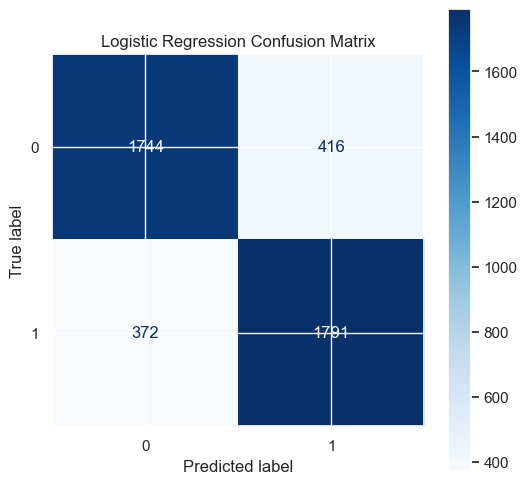

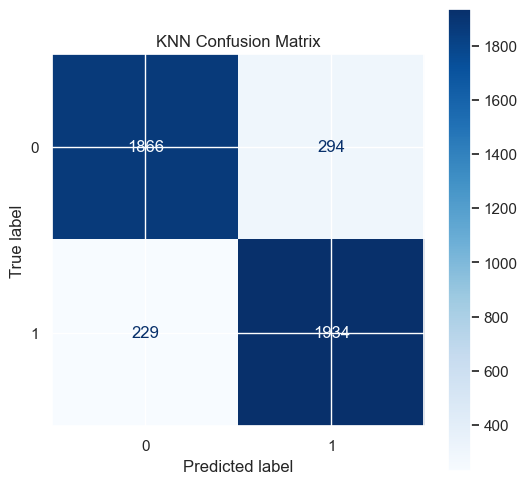

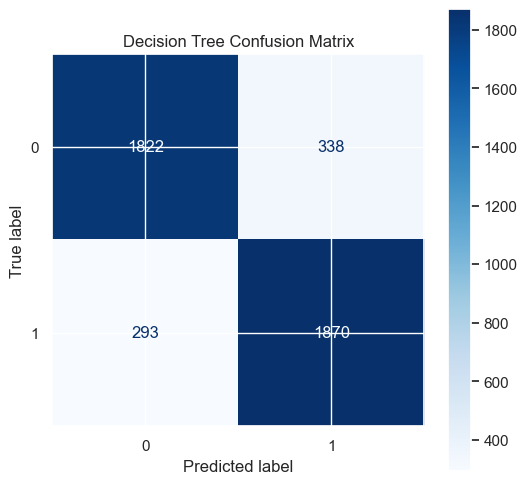

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
cmLogReg = confusion_matrix(dataSplitter.outcome_test_class, logreg.predict(dataSplitter.data_test))
cmLogRegDis = ConfusionMatrixDisplay(cmLogReg)
cmLogRegDis.plot(cmap='Blues', ax=ax)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
cmKNN = confusion_matrix(dataSplitter.outcome_test_class, KNN.predict(dataSplitter.data_test))
cmKNNDis = ConfusionMatrixDisplay(cmKNN)
cmKNNDis.plot(cmap='Blues', ax=ax)
plt.title('KNN Confusion Matrix')
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
cmDecisionTree = confusion_matrix(dataSplitter.outcome_test_class, decisionTree.predict(dataSplitter.data_test))
cmDecisionTreeDis = ConfusionMatrixDisplay(cmDecisionTree)
cmDecisionTreeDis.plot(cmap='Blues', ax=ax)
plt.title('Decision Tree Confusion Matrix')
plt.show()


### Q3-2-2. Finding the hyperparameters of the models using Grid Search

`GridSearchCV` is a method in scikit-learn that performs an exhaustive search over a specified parameter grid to find the best combination of hyperparameters for a given estimator. The `GridSearchCV` method takes several parameters that control the search process. Here are some of the most important parameters:

1. `estimator`: The estimator object that will be used to fit the data. This can be any scikit-learn estimator that implements the `fit` method.

2. `param_grid`: A dictionary or a list of dictionaries that specifies the hyperparameters to search over. The keys of the dictionary are the names of the hyperparameters, and the values are lists of values to try for each hyperparameter.

3. `cv`: The cross-validation strategy to use. This can be an integer to specify the number of folds in a K-fold cross-validation, or a cross-validation object from scikit-learn.

4. `scoring`: The scoring metric to use to evaluate the performance of the model. This can be a string that specifies a built-in scoring metric, or a callable object that implements a custom scoring metric.

5. `n_jobs`: The number of CPU cores to use for parallel processing. Setting `n_jobs=-1` will use all available CPU cores.

6. `verbose`: The level of verbosity during the search process. Setting `verbose=1` will print progress messages during the search.

7. `refit`: Whether to refit the estimator with the best hyperparameters on the entire dataset after the search is complete. Setting `refit=True` will refit the estimator.


#### Logistic regression 
It has several hyperparameters that can be tuned to improve the performance of the model. Here are some of the most important hyperparameters of logistic regression:

1. `Penalty`: Logistic regression can use either L1 or L2 regularization to prevent overfitting. The `penalty` hyperparameter controls which type of regularization to use. L1 regularization can be used to perform feature selection by setting some coefficients to zero, while L2 regularization can be used to shrink the coefficients towards zero.

2. `C`: The `C` hyperparameter controls the strength of the regularization. A smaller value of `C` results in stronger regularization, which can help prevent overfitting but may also lead to underfitting. A larger value of `C` results in weaker regularization, which can lead to overfitting but may also improve the model's performance on the training data.

3. `Solver`: Logistic regression can use different optimization algorithms to find the optimal coefficients. The `solver` hyperparameter controls which algorithm to use. The most common solvers are 'lbfgs', 'liblinear', 'newton-cg', 'sag', and 'saga'. The choice of solver can affect the speed and accuracy of the model.

4. `Max iterations`: The `max_iter` hyperparameter controls the maximum number of iterations for the solver to converge. If the solver does not converge within the maximum number of iterations, it will stop and return the current solution. Increasing the maximum number of iterations can improve the accuracy of the model but may also increase the training time.

5. `Class weight`: The `class_weight` hyperparameter can be used to adjust the weights of the classes to account for class imbalance. By default, logistic regression assumes that the classes are balanced, but if one class is much more common than the other, the model may be biased towards the majority class. The `class_weight` hyperparameter can be set to 'balanced' to automatically adjust the weights based on the number of samples in each class.

6. `scoring`: The scoring method which we want to use.

7. `n_jobs`: Number of jobs to run in parallel. `-1` means using all processors.

In [43]:
grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
logRegGrid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=grid,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
logRegGrid.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f"Best Accuracy: {logRegGrid.best_score_ * 100:2.2f}%")
print(f"Best Parameters: {logRegGrid.best_params_}")
print(f"Logistic Regression Accuracy: {logRegGrid.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%")

Best Accuracy: 81.90%
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 81.73%


#### KNN
The KNN algorithm has a single hyperparameter, which is the number of neighbors `k` to consider when making a prediction. However, there are several other factors that can affect the performance of the KNN algorithm. Here are some of the most important hyperparameters of KNN:

1. `n_neighbors`: The number of neighbors `k` to consider when making a prediction. A larger value of `k` can help reduce the effect of noise in the data, but may also lead to underfitting. A smaller value of `k` can help capture more complex patterns in the data, but may also lead to overfitting.

2. `weights`: The weight function used in prediction. The default is 'uniform', which gives equal weight to all neighbors. Another option is 'distance', which gives more weight to closer neighbors.
    * `uniform`: uniform weights. All points in each neighborhood are weighted equally.

    * `distance`: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.


3. `algorithm`: The algorithm used to compute the nearest neighbors. The default is 'auto', which selects the most appropriate algorithm based on the input data. Other options include 'ball_tree', 'kd_tree', and 'brute'.

4. `leaf_size`: The size of the leaf node in the KD-tree or Ball-tree algorithm. A smaller value of `leaf_size` can lead to faster queries but may also increase the memory usage.

5. `p`: The power parameter for the Minkowski distance metric. The default is `p=2`, which corresponds to the Euclidean distance metric. Other values of `p` can be used to compute other distance metrics, such as Manhattan distance (`p=1`) or Chebyshev distance (`p=inf`).

6. `metric`: The distance metric to use for the tree. The default metric is `minkowski`, and with `p=2` is equivalent to the standard Euclidean metric.

In [44]:
grid = {
    "n_neighbors": list(range(1, 11)) + list(range(20, 81, 10)), 
    # "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    # "leaf_size": [10, 20],
    "p": [1, 2],
}
KNNGrid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=grid,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
KNNGrid.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f"Best Accuracy: {KNNGrid.best_score_ * 100:2.2f}%")
print(f"Best Parameters: {KNNGrid.best_params_}")
print(f"KNN Accuracy: {KNNGrid.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%")

Best Accuracy: 88.47%
Best Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 30, 'p': 1}
KNN Accuracy: 88.73%


#### Decision Tree
Here are some of the most important hyperparameters of decision trees:

1. `criterion`: The function used to measure the quality of a split. The default is 'gini', which uses the Gini impurity measure. Another option is 'entropy', which uses the information gain measure.

2. `max_depth`: The maximum depth of the decision tree. A larger value of `max_depth` can capture more complex patterns in the data, but may also lead to overfitting. A smaller value of `max_depth` can help prevent overfitting but may also lead to underfitting.

3. `min_samples_split`: The minimum number of samples required to split an internal node. A larger value of `min_samples_split` can help prevent overfitting but may also lead to underfitting.

4. `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A larger value of `min_samples_leaf` can help prevent overfitting but may also lead to underfitting.

5. `max_features`: The maximum number of features to consider when making a split. The default is 'auto', which uses all features. Another option is 'sqrt', which uses the square root of the number of features.

6. `class_weight`: The weight function used in the classification. The default is None, which means all classes have equal weight. Another option is 'balanced', which automatically adjusts the weights based on the number of samples in each class.

7. `splitter`: The strategy used to choose the split at each node. Supported strategies are `"best"` to choose the best split and `"random"` to choose the best random split.

In [45]:
grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [list(range(1, 11)).append(None)],
    "min_samples_split": range(1, 11),
    "min_samples_leaf": range(1, 11),
    "random_state": [54],
}
decisionTreeGrid = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=grid,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
decisionTreeGrid.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f"Best Accuracy: {decisionTreeGrid.best_score_ * 100:2.2f}%")
print(f"Best Parameters: {decisionTreeGrid.best_params_}")
print(f"Decision Tree Accuracy: {decisionTreeGrid.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%")

Best Accuracy: 87.20%
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 1, 'random_state': 54, 'splitter': 'random'}
Decision Tree Accuracy: 87.90%


### Q3-2-3. Overfitting and Underfitting

First, we need to explain bias and variance:

- **Bias:**  
  Bias is how precise we are at training the subtleties of the training data.  
  The more precise we are, the lower the bias.  
  This means that we are taking every feature and perhaps the noisy data into account.  
  The lower the bias, the lower our detection error is on the training data.  
  This is not necessarily good because we train on the wrong and noisy data which will lower the generalization of the classifier.
- **Variance:**  
  Variance is a measure of how good the classifier is on unseen data.  
  The better it is on testing data, the lower the variance.  
  This means that the classifier is generalized enough and can detect the testing data correctly.

As much as we want low bias and variance at once, that is not usually the case because once we lower one, the other one increases.  

---
`Overfitting` and `underfitting` are two common problems that can occur when building machine learning models. 

**`Overfitting:`** occurs when a model is too complex and fits the training data too closely, to the point where it captures noise in the data rather than the underlying patterns. This can lead to poor generalization performance, where the model performs well on the training data but poorly on new, unseen data. `Overfitting` can occur when a model has too many features, is too complex, or is trained for too long. `Overfitting` can be detected by comparing the performance of the model on the training data and the validation data. If the performance on the validation data is significantly worse than the performance on the training data, the model may be `overfitting`.

**`Underfitting:`** occurs when a model is too simple and cannot capture the underlying patterns in the data. This can lead to poor performance on both the training data and new, unseen data. `Underfitting` can occur when a model has too few features, is too simple, or is not trained for long enough. `Underfitting` can be detected by comparing the performance of the model on the training data and the validation data. If the performance on both the training data and the validation data is poor, the model may be `underfitting`.

To address `overfitting`, we can use techniques such as regularization, early stopping, or reducing the complexity of the model. Regularization adds a penalty term to the loss function to discourage large weights, while early stopping stops the training process when the performance on the validation data stops improving. To address `underfitting`, we can use techniques such as increasing the number of features, increasing the complexity of the model, or training the model for longer. However, it's important to balance the complexity of the model with the amount of data available, as a more complex model may require more data to avoid `overfitting`.

In [46]:
logRegTrain = LogisticRegression(**logRegGrid.best_params_)
logRegTrain.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'Logistic Regression Accuracy train data: {logRegTrain.score(dataSplitter.data_train, dataSplitter.outcome_train_class) * 100:2.2f}%')
logRegTest = LogisticRegression(**logRegGrid.best_params_)
logRegTest.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'Logistic Regression Accuracy test data: {logRegTest.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%')
print("----------------------------------------------------------")

DTTrain = DecisionTreeClassifier(**decisionTreeGrid.best_params_)
DTTrain.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'Decision Tree Accuracy train data: {DTTrain.score(dataSplitter.data_train, dataSplitter.outcome_train_class) * 100:2.2f}%')
DTTest = DecisionTreeClassifier(**decisionTreeGrid.best_params_)
DTTest.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'Decision Tree Accuracy test data: {DTTest.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%')
print("----------------------------------------------------------")

KNNTrain = KNeighborsClassifier(**KNNGrid.best_params_)
KNNTrain.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'KNN Accuracy train data: {KNNTrain.score(dataSplitter.data_train, dataSplitter.outcome_train_class) * 100:2.2f}%')
KNNTest = KNeighborsClassifier(**KNNGrid.best_params_)
KNNTest.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f'KNN Accuracy test data: {KNNTest.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:2.2f}%')


Logistic Regression Accuracy train data: 81.93%
Logistic Regression Accuracy test data: 81.73%
----------------------------------------------------------
Decision Tree Accuracy train data: 89.39%
Decision Tree Accuracy test data: 87.90%
----------------------------------------------------------
KNN Accuracy train data: 89.11%
KNN Accuracy test data: 88.73%


As can be seen, None of them has overfitting or underfitting.

### Q3-2-4. Changing the pre-processing steps to improve the models
Preprocessing is an extremely important step in machine learning.  
The preprocessing steps have been changed a lot to reach the percentages seen before.  
An example would be the threshold for correlation to keep.

## Ensemble Learning

#### Q4-1. Effect of the hyperparameters on the model.
Random Forest is an ensemble learning method that combines multiple decision trees to improve the performance of the model. Random Forest has several hyperparameters that can be tuned to improve the performance of the model. Here are some of the most important hyperparameters of Random Forest:

1. `n_estimators`: The number of decision trees in the Random Forest. A larger value of `n_estimators` can improve the performance of the model, but may also increase the training time and memory usage.

2. `criterion`: The function used to measure the quality of a split. The default is 'gini', which uses the Gini impurity measure. Another option is 'entropy', which uses the information gain measure.

3. `max_depth`: The maximum depth of the decision trees in the Random Forest. A larger value of `max_depth` can capture more complex patterns in the data, but may also lead to overfitting. A smaller value of `max_depth` can help prevent overfitting but may also lead to underfitting.

4. `min_samples_split`: The minimum number of samples required to split an internal node. A larger value of `min_samples_split` can help prevent overfitting but may also lead to underfitting.

5. `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A larger value of `min_samples_leaf` can help prevent overfitting but may also lead to underfitting.

6. `max_features`: The maximum number of features to consider when making a split. The default is 'auto', which uses the square root of the number of features. Another option is 'sqrt', which uses the square root of the number of features.

7. `class_weight`: The weight function used in the classification. The default is None, which means all classes have equal weight. Another option is 'balanced', which automatically adjusts the weights based on the number of samples in each class.

8. `random_state`: Controls the randomness of the estimator. If an integer is given, the randomness will be deterministic and the results will be reproducible.

In [47]:
grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(2, 8)) + [None],
    "min_samples_split": range(2, 5),
    # "min_samples_leaf": range(1, 4),
    "random_state": [54],
}
forest_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=grid,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
forest_grid_search.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
print(f"Best Accuracy: {forest_grid_search.best_score_ * 100:5.2f}%")
print(f"Best Parameters: {forest_grid_search.best_params_}")
print(f"Random Forest Accuracy: {forest_grid_search.score(dataSplitter.data_test, dataSplitter.outcome_test_class) * 100:5.2f}%")

Best Accuracy: 89.32%
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4, 'random_state': 54}
Random Forest Accuracy: 89.89%


Text(0, 0.5, 'Accuracy')

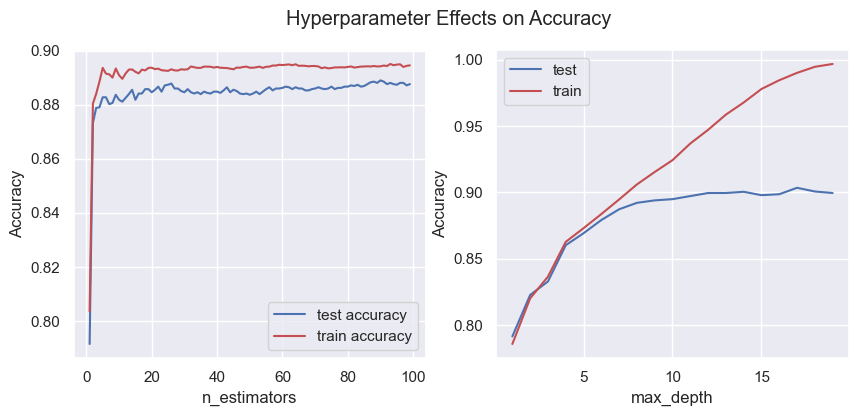

In [48]:
n_estimators_range = range(1, 100)
max_depth_range = range(1, 20)

plt.figure(figsize=(10, 4))
plt.suptitle('Hyperparameter Effects on Accuracy')
plt.subplot(1, 2, 1)

test_results = []
train_results = []

for estimator in n_estimators_range:
    forest = RandomForestClassifier(criterion="gini",  max_depth=7, min_samples_split=2, random_state=54, n_estimators=estimator)
    forest.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
    test_results.append(accuracy_score(dataSplitter.outcome_test_class, forest.predict(dataSplitter.data_test)))
    train_results.append(accuracy_score(dataSplitter.outcome_train_class, forest.predict(dataSplitter.data_train)))
    
plt.plot(n_estimators_range, test_results, color="b", label="test accuracy")
plt.plot(n_estimators_range, train_results, color="r", label="train accuracy")
plt.legend(loc="lower right")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
test_results = []
train_results = []

for depth in max_depth_range:
    forest = RandomForestClassifier(criterion="gini",  max_depth=depth, min_samples_split=2, random_state=54)
    forest.fit(dataSplitter.data_train, dataSplitter.outcome_train_class)
    test_results.append(accuracy_score(dataSplitter.outcome_test_class, forest.predict(dataSplitter.data_test)))
    train_results.append(accuracy_score(dataSplitter.outcome_train_class, forest.predict(dataSplitter.data_train)))
    
plt.plot(max_depth_range, test_results, color="b", label="test")
plt.plot(max_depth_range, train_results, color="r", label="train")
plt.legend(loc="upper left")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

Increasing the `n_estimators` and `max_depth` hyperparameters in the `RandomForestClassifier` can help improve the performance of the model in different ways.

Increasing the `n_estimators` hyperparameter increases the number of decision trees in the Random Forest. This can help improve the performance of the model by reducing the variance of the model and making it more robust to noise in the data. By combining the predictions of multiple decision trees, the Random Forest can reduce the risk of overfitting and improve the generalization performance of the model. However, increasing the `n_estimators` hyperparameter can also increase the training time and memory usage of the model.

Increasing the `max_depth` hyperparameter increases the maximum depth of the decision trees in the Random Forest. This can help improve the performance of the model by allowing the decision trees to capture more complex patterns in the data. By increasing the depth of the decision trees, the Random Forest can learn more complex decision boundaries and improve the accuracy of the model. However, increasing the `max_depth` hyperparameter can also increase the risk of overfitting and lead to poor generalization performance on new, unseen data, As can be seen in the graph after 7 we see overfitting.

It's important to note that increasing these hyperparameters should be done with caution, as they can also increase the risk of overfitting and lead to poor generalization performance. It's important to balance the complexity of the model with the amount of data available, and to use techniques such as cross-validation and regularization to prevent overfitting.

#### Q4-2. Compare this model to Decision Tree. Explain about Bias and Variance.
`Bias` refers to the difference between the expected predictions of a model and the true values of the target variable. A model with high bias is one that is too simple and cannot capture the underlying patterns in the data. This can lead to underfitting, where the model has poor performance on both the training data and new, unseen data. A model with low bias is one that is more complex and can capture the underlying patterns in the data. However, a model with low bias can also be more prone to overfitting, where the model fits the training data too closely and captures noise in the data rather than the underlying patterns.

`Variance` refers to the variability of the model's predictions for different training sets. A model with high variance is one that is too complex and fits the training data too closely, to the point where it captures noise in the data rather than the underlying patterns. This can lead to overfitting, where the model has poor generalization performance and performs well on the training data but poorly on new, unseen data. A model with low variance is one that is more robust and can generalize well to new, unseen data. However, a model with low variance can also be more prone to underfitting, where the model is too simple and cannot capture the underlying patterns in the data.

The goal of machine learning is to find a model that has low bias and low variance, which can generalize well to new, unseen data. This can be achieved by balancing the complexity of the model with the amount of data available, and by using techniques such as cross-validation and regularization to prevent overfitting. Cross-validation can help estimate the generalization performance of the model, while regularization can help prevent overfitting by adding a penalty term to the loss function to discourage large weights. By finding the right balance between bias and variance, we can build models that can accurately capture the underlying patterns in the data and generalize well to new, unseen data.

---

**Comparison:**

`Bias:`
- Decision Trees: Decision Trees have high bias because they are prone to underfitting. Decision Trees are simple models that can only capture linear or simple nonlinear relationships between the features and the target variable. This can lead to poor performance on complex datasets where the underlying patterns are more complex.
- Random Forests: Random Forests have low bias because they are more complex models that can capture more complex patterns in the data. By combining the predictions of multiple decision trees, Random Forests can reduce the risk of underfitting and improve the generalization performance of the model.

`Variance:`
- Decision Trees: Decision Trees have high variance because they are prone to overfitting. Decision Trees can fit the training data too closely and capture noise in the data rather than the underlying patterns. This can lead to poor generalization performance on new, unseen data.
- Random Forests: Random Forests have low variance because they are more robust models that can generalize well to new, unseen data. By combining the predictions of multiple decision trees, Random Forests can reduce the risk of overfitting and improve the generalization performance of the model.

Overall, Random Forests tend to have lower bias and lower variance than Decision Trees. This is because Random Forests combine the predictions of multiple decision trees, which can reduce the risk of underfitting and overfitting and improve the generalization performance of the model. However, Random Forests can also be more computationally expensive and require more memory than Decision Trees, especially for large datasets.

In [49]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_leaf=8, min_samples_split=1, random_state=54, splitter="random")
dataSplitter.binary_price_level()

_, treeBias, treeVar = bias_variance_decomp(
    estimator=tree,
    X_train=dataSplitter.data_train.values,
    y_train=dataSplitter.outcome_train_binary.values,
    X_test=dataSplitter.data_test.values,
    y_test=dataSplitter.outcome_test_binary.values,
    loss="mse",
    num_rounds=100,
    random_seed=1,
)

forest = RandomForestClassifier(criterion="gini",  max_depth=7, min_samples_split=2, random_state=54)
_, forestBias, forestVar = bias_variance_decomp(
    estimator=forest,
    X_train=dataSplitter.data_train.values,
    y_train=dataSplitter.outcome_train_binary.values,
    X_test=dataSplitter.data_test.values,
    y_test=dataSplitter.outcome_test_binary.values,
    loss="mse",
    num_rounds=100,
    random_seed=1,
)

print(f"Tree Bias      : {treeBias:2.2f}")
print(f"Tree Variance  : {treeVar:2.2f}")
print(f"Forest Bias    : {forestBias:2.2f}")
print(f"Forest Variance: {forestVar:2.2f}")

Tree Bias      : 0.07
Tree Variance  : 0.06
Forest Bias    : 0.10
Forest Variance: 0.02


As we predicted the random forest's variance was less, but bias was higher which can be due to these reasons:

1. Hyperparameter tuning: The performance of Random Forest models can be highly sensitive to the choice of hyperparameters, such as the number of trees, the maximum depth of the trees, and the minimum number of samples required to split a node. If the hyperparameters of the Random Forest model are not tuned properly, it may result in a model with higher bias.

2. Feature selection: Random Forest models can be sensitive to the choice of features used to train the model. If the features used in the Random Forest model are not informative or relevant to the target variable, it may result in a model with higher bias.

3. Data quality: The performance of Random Forest models can be affected by the quality of the data used to train the model. If the data contains missing values, outliers, or other types of noise, it may result in a model with higher bias.

4. Sample size: Random Forest models can be sensitive to the size of the training data. If the training data is too small, it may result in a model with higher bias.


## Gradient Boosting
### Q5-1. Explain about this method and it's difference with decision tree.
**Gradient Boosting:**
It builds an ensemble of decision trees to make predictions. It works by iteratively adding decision trees to the ensemble, with each new tree attempting to correct the errors made by the previous trees.

The algorithm starts by building a single decision tree on the training data. It then uses this tree to make predictions on the training data, and calculates the errors between the predicted values and the actual values. These errors are then used to train a second decision tree, which attempts to correct the errors made by the first tree. This process is repeated for a specified number of iterations, with each new tree attempting to correct the errors made by the previous trees.

During each iteration, the algorithm calculates the gradient of the loss function with respect to the predictions made by the current ensemble. This gradient is then used to fit a new decision tree to the negative gradient of the loss function, which is the residual error that the current ensemble is unable to explain. The new tree is then added to the ensemble, and the process is repeated until the specified number of iterations is reached.

The final prediction of the ensemble is the sum of the predictions made by all the individual trees in the ensemble. The algorithm uses a learning rate parameter to control the contribution of each new tree to the final prediction. A smaller learning rate will result in a more conservative model, while a larger learning rate will result in a more aggressive model.

---

**Differnces:**

The main difference between Gradient Boosting and Decision Trees is that Gradient Boosting is an ensemble method that combines multiple decision trees to make predictions, while Decision Trees are standalone models that make predictions based on a single tree.

Decision Trees are a simple and interpretable model that can be used for both regression and classification tasks. They work by recursively splitting the data into subsets based on the values of the input variables, until a stopping criterion is met. The resulting tree structure can be visualized and interpreted, making it easy to understand how the model is making predictions.

Gradient Boosting, on the other hand, is a more complex and powerful algorithm that can be used for both regression and classification tasks. It works by iteratively adding decision trees to the ensemble, with each new tree attempting to correct the errors made by the previous trees. The resulting ensemble of trees can be more accurate than a single decision tree, but it is also more complex and harder to interpret.

Another difference between Gradient Boosting and Decision Trees is that Gradient Boosting can handle non-linear relationships between the input variables and the output variable, while Decision Trees are limited to linear relationships. Gradient Boosting can also handle missing data and outliers more effectively than Decision Trees, as it is less prone to overfitting.

In summary, Decision Trees are simple and interpretable models that can be used for both regression and classification tasks, while Gradient Boosting is a more complex and powerful algorithm that combines multiple decision trees to make predictions. Gradient Boosting can handle non-linear relationships, missing data, and outliers more effectively than Decision Trees, but it is also more complex and harder to interpret.

### Q5-2. What is XGBoost and how does it work?

XGBoost (Extreme Gradient Boosting) is a popular implementation of the Gradient Boosting algorithm that is designed to be highly scalable and efficient.  The XGBoost algorithm uses a technique called gradient boosting to minimize a loss function, which is a measure of how well the model is able to predict the target variable. One of the key features of XGBoost is its ability to handle missing data and outliers. It does this by using a technique called regularization, which penalizes complex models and encourages simpler models that are less likely to overfit the data. XGBoost also uses a technique called pruning to remove branches of the decision tree that do not contribute to the overall accuracy of the model.

Another important feature of XGBoost is its ability to handle both sparse and dense data. It does this by using a technique called sparsity-aware split finding, which is able to handle missing values and zero values in sparse data more efficiently than traditional split finding algorithms.

XGBoost also includes a number of other features that make it a powerful and flexible algorithm for machine learning tasks. These include support for custom loss functions, early stopping to prevent overfitting, and the ability to handle multi-class classification problems.

Overall, XGBoost is a highly effective algorithm for a wide range of machine learning tasks, including regression, classification, and ranking. Its ability to handle missing data, outliers, and sparse data, as well as its support for custom loss functions and early stopping, make it a popular choice for many data scientists and machine learning practitioners.

### Q5-3. Implement XGBoost algorithm tune it's hyperparameters.
Here are some of the most important hyperparameters for the XGBoost algorithm:

1. `max_depth`: The maximum depth of each decision tree in the ensemble. Increasing this value can make the model more complex and potentially more accurate, but may also increase the risk of overfitting.

2. `learning_rate`: The step size used to update the weights of the model during each iteration. A smaller learning rate can make the model more conservative and less prone to overfitting, but may also require more iterations to converge.

3. `n_estimators`: The number of decision trees in the ensemble. Increasing this value can make the model more accurate, but may also increase the risk of overfitting and make the model slower to train.

4. `subsample`: The fraction of the training data used to train each decision tree. Setting this value to less than 1.0 can make the model more robust to noise and reduce overfitting.

5. `colsample_bytree`: The fraction of the features used to train each decision tree. Setting this value to less than 1.0 can make the model more robust to noise and reduce overfitting.

6. `gamma`: The minimum reduction in the loss function required to make a split at a node. Increasing this value can make the model more conservative and less prone to overfitting.

7. `reg_alpha`: L1 regularization term on weights. Increasing this value can make the model more conservative and less prone to overfitting.

8. `reg_lambda`: L2 regularization term on weights. Increasing this value can make the model more conservative and less prone to overfitting.


In [50]:
xgb = XGBClassifier()

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 200],
    # 'subsample': [0.5, 0.7, 1],
    # 'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 1, 5]
}

xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=params, cv=5, scoring="accuracy")
xgb_grid_search.fit(dataSplitter.data_train, dataSplitter.outcome_train_binary)
print(f"Best Accuracy: {xgb_grid_search.best_score_ * 100:2.2f}%")
print(f"Best Parameters: {xgb_grid_search.best_params_}")
print(f"Gradient-boosting Accuracy: {xgb_grid_search.score(dataSplitter.data_test, dataSplitter.outcome_test_binary) * 100:2.2f}%")


Best Accuracy: 89.22%
Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Gradient-boosting Accuracy: 89.50%
